# Final Project:  Sentiment Analysis of Recipe Reviews

**Company Background:** The company, Taste of Home, was founded in 1993.  This company is based in the United States and originally published a magazine with recipes from home cooks. It has since evolved into an online presence.  Recipes posted on their website garner user reviews and users can react to comments with thumbs-up or thumbs-down responses. 

**Dataset Description:**  The "Recipe Reviews and User Feedback" dataset contains descriptions and top 100 rankings from a recipe website called "tasteofhome".  It includes text comments on the recipe, with user responses via up and down votes, timestamps, as well as the company's internal scores for users and comments.  In addition, the recipes are given from 1 to 5 stars (where a higher number is better) and zeros denote no rating provided.  The dataset consists of 18182 instances across 15 features.  The data is a mix of integer, categorical, time series and text.  

**Date:** October 23, 2023

**Citation:** Ali,Amir, Matuszewski,Stanislaw , and Czupyt,Jacek. (2023). Recipe Reviews and User Feedback. UCI Machine Learning Repository. 

**Link:** https://doi.org/10.24432/C5FG95

**Project Approach:** For this project, we conduct sentiment analysis of user reviews on the recipes.  Since the data contains ratings, we use Unsupervised and Supervised Learning methods.  The high star ratings will be flagged as a reviewer who "is a fan" of the recipe -- whereas, low star ratings will be considered "not a fan" of the recipe.  The context is a company wanting to evaluate user reviews based on a positive or negative assessment.

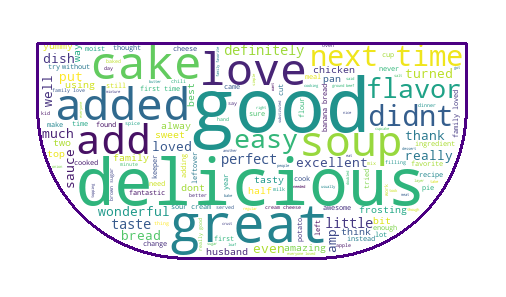

## About the Data:


**Table 1**

_Explanation of Data Fields with Description of each Variable_

|Variable |	Description|  Data Type |              
|:---------|:-------------|:-------------|
|**num_records**	|The number of records | integer |
|**recipe_number** | The ranking of the recipe in the list of top 100 recipes | integer |
|**recipe_code**|	The identification number of the recipe | integer|
|**recipe_name**	|The name of the recipe | categorical |
|**comment_id** | The identification number of the comment | categorical |
|**user_id**|	The identification number of the user | categorical|
|**user_name**	|The name of the user | categorical |
|**user_reputation** | An internal score by the website | integer |
|**created_at**|	The UNIX timestamp when the comment was posted | integer|
|**reply_count**	|The number of replies to the comment | integer |
|**thumbs_up** | The number of up-votes for the comment | integer |
|**thumbs_down**|	The number of down-votes for the comment | integer|
|**stars**	|The score a user issued to the recipe between 1-5.  A zero score indicates no review. | integer |
|**best_score** | The score of the comment, as used by the site | integer |
|**text**|	The comment on the recipe | categorical|

_Note:_  As shown in Table 1 above, the dataset contains 15 variables of which 10 are numerical and the rest are categorical.  There are 18182 rows of data.

## Statement of Interest:

The questions we would like to address are:

* Which method was most successful?

* How do our Unsupervised Learning and Supervised Learning models compare?

* How do our feature extraction methods and parameters impact our results?

* Can we improve our model's performance?

* Can we use our model to predict unlabeled data?

* Which models attain similar results with a subset of the data?

* Which models are at risk of overfitting?


## Methodology

To evaluate the accuracy of the models below, the data will be split into a train and test set where we can check the accuracy on a separate, test set of data.  This segmentation will enable us to compare results across the models, as well as identify possible overfitting.  Due to the dataset containing exclusively comments on the top 100 recipes, the text is skewed toward positive reviews.  Therefore, we also need to consider balancing options.

For our Unsupervised Learning methods, we will utilize:

* Clustering

* Non-negative Matrix Factorization (NMF)

For our Supervised Learning methods, we will utilize:

* Multinomial Naive Bayes

* Logistic Regression

To vectorize the text, we will utilize Gensim's Word2Vec and scikit-learn's CountVectorizer plus TfidfVectorizer.  Additionally, we will use RandomizedSearchCV to help with our parameter tuning and, hopefully, improve our models.

## Evaluation Metrics

Our primary task is Unsupervised Learning; therefore, we will explore Unsupervised Learning methods with text analysis.  Since this dataset contains a star ratings category, we can also utilize the ratings to evaluate  our Unsupervised Learning models.  In particular, we can explore how accurately our models identify a positive review from "a fan" versus a negative review from someone who was "not a fan". Then, we can compare those results to a couple Supervised Learning models.  

Therefore, we will use three main tools:

* **Classification Report**: This report shows Accuracy, Precision, Recall and F1 scores for the classes. Our primary metric, Accuracy, indicates the overall percentage of correct predictions but can be skewed by imbalanced data. In the case of "fans", Precision indicates the percentage of our predictions that were actually "fans" -- whereas Recall indicates the percentage of "fans" that we correctly identified. The F1 score blends the Precision and Recall scores. Ideally, we want a model that predicts well across either "fan" or "not a fan" categories.
    
* **Confusion Matrix**: This matrix shows the numbers of correctly identified and misidentified classes.  These values are also referred to as: True Positive, True Negative, False Positive and False Negative. A Type I error is a False Positive and Type II error is a False Negative. For example, a False Positive value indicates how many positive comments were incorrectly predicted as negative according to the model.  Again, ideally, we want a model that predicts well across either "fan" or "not a fan" categories.
    
    
* **Execution Times**: We will also track the execution times for our models utilizing a tool called "timeit", since text documents can have large datasets. This tool runs a loop of the model multiple times -- returning the mean, as well as standard deviation of the execution time.

Our objective is to have a model successfully identifying positive or negative comments and executing quickly. 

## Summary of Results

Here is a summary of the Accuracy scores from each of our models on the test data.  We will walk through each of these models below.  The predictions from the top Unsupervised and Supervised Learning models are shown in blue below.

**Table 2**

_Summary of Results for all Models on Test Data_

|Model|	Vectorizer|  Accuracy %|            
|:---------|:------------:|:----------:|
|**K-Means**| Tfidf |  $\color{blue}{ 80.8}$ |
|**Agglomerative Clustering**| Tfidf |  64.5 |
|**NMF (solver: cd)** | Tfidf | 72.0|
|**NMF (solver: mu)**| Tfidf| 79.5|
|**Multinomial Naive Bayes**| Tfidf| 88.9|
|**Logistic Regression**| Word2Vec| 85.3|
|**Logistic Regression**| Count| 89.3|
|**Logistic Regression**| Tfidf| $\color{blue}{ 90.2}$|


## Github Link:  
https://github.com/chiffr3/Unsupervised_Learning

# Data Cleaning and Pre-Processing

## Import Packages

To start, we will import the following packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
import itertools
from collections import Counter
import re
from gensim.test.utils import common_texts
from gensim.models import Word2Vec, KeyedVectors 
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score 
from time import time
from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator
import timeit

## nltk packages and lemmatization
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

## Load Data

Next, we load the data.

In [2]:
# Read in the file
recipes = pd.read_csv('Recipe_Reviews_and_User_Feedback.csv')

## Inspect the Data

Let's start with a basic inspection of the data.  We will first check the information summary of the data, check the data type and see if we have null values.

In [3]:
# View the info 
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


**Summary:**
  
Here we see the 15 columns with 10 integer data types and 5 object data types.  There are 18182 entries for the dataframe.  Some specific items to note:

* It also appears our "num_of_records" column is currently called "Unnamed: 0". 

* We also have "recipe_number" and "recipe_code" columns.  Checking our Table 1 explanation of the data fields, we see the recipe number refers to the rank and the recipe code is an identifier.  

* Our other identifier columns ("comment_id", "user_id") have "id" in the name. 

* There are possibly 2 missing instances in the text column.  

Therefore, we can rename these columns to clarify and ensure consistency across the data set.  Let's fix the naming issues, then we can view the first few rows of this dataset to get a better of idea of the content.

### Correct column naming issues

Let's fix the naming issues we identified above.

In [4]:
# Correct the name issue 
recipes = recipes.rename(columns = {'Unnamed: 0': 'num_records'})

# Clarify the recipe number is actually the rank
recipes = recipes.rename(columns = {'recipe_number': 'recipe_rank'})

# Ensure consistency in naming, since recipe code is the identification number
recipes = recipes.rename(columns = {'recipe_code': 'recipe_id'})

In [5]:
# View head of dataset
pd.set_option('display.max_colwidth',25)
recipes.head()

,num_records,recipe_rank,recipe_id,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2...,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,I tweaked it a little...
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2...,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a w...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2...,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complic...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2...,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction,..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2...,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made thi...


**Summary:**
  
Here we notice a number of interesting points about this data.  Let's summarize some items we need to investigate further below:

* There is an index, along with num_records column
* The comment_id and user_id columns appear to be in alphanumeric formats
* The user reputation contains values from 1 to 50, possibly higher
* The created_at time information would need to be reformated
* There appear to be a number of zeros in the reply_count, thumbs_up and thumbs_down columns
* The best_score column contains some very high numerical values

Let's encode the comment_id and user_id columns then we can utilize the describe view.

### Encode comment and user id

In [6]:
# Label Encoder
le = LabelEncoder()  

In [7]:
# use label encoder to transform comment
recipes['comment_id'] = le.fit_transform(recipes['comment_id'])

# use label encoder to transform user_id
recipes['user_id'] = le.fit_transform(recipes['user_id'])

#check output
print("Comment id", recipes['comment_id'].unique())
print("User id", recipes['user_id'].unique())

Comment id [ 3409  3408  3407 ... 17338 17289 17318]
User id [13113 13275 13694 ... 10710  7333   844]


### Check Describe view

Now, we can check the describe view to see the count for each column, as well as minimum and maximum values.

In [8]:
# Describe
round(recipes.describe(),1)

,num_records,recipe_rank,recipe_id,comment_id,user_id,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.0,18182.0,18182.0,18182.0,18182.0,18182.0,1.818200e+04,18182.0,18182.0,18182.0,18182.0,18182.0
mean,121.5,38.7,21773.7,9090.5,5892.9,2.2,1.623710e+09,0.0,1.1,0.5,4.3,153.2
std,116.7,29.8,23965.1,5248.8,4209.9,10.0,5.468697e+06,0.1,4.2,3.5,1.5,141.1
min,0.0,1.0,386.0,0.0,0.0,0.0,1.613035e+09,0.0,0.0,0.0,0.0,0.0
25%,45.0,12.0,6086.0,4545.2,2003.2,1.0,1.622717e+09,0.0,0.0,0.0,5.0,100.0
50%,91.0,33.0,14600.0,9090.5,5408.5,1.0,1.622718e+09,0.0,0.0,0.0,5.0,100.0
75%,150.0,64.0,33121.0,13635.8,9511.8,1.0,1.622718e+09,0.0,0.0,0.0,5.0,100.0
max,724.0,100.0,191775.0,18181.0,13811.0,520.0,1.665756e+09,3.0,106.0,126.0,5.0,946.0


**Summary:**
  
Let's add to the items we identified above.  We will want to check the counts, as well as the distributions of this data.

* The user reputation contains values from 0 to 520, with a mean value of 2.16 and 75% of the data at 1.0
* There are mostly zeros in the reply_count column, with a maximum value of 3.0
* There are mostly zeros in the thumbs_up and thumbs_down columns with maximum values over 100
* There appear to be mostly 5 stars in the stars column
* The best_score column has values ranging from 0 to 946

Let's check the number of unique values for each column.

**Check Number of Unique Values**

In [9]:
# Number of unique
recipes.nunique()

num_records          725
recipe_rank          100
recipe_id            100
recipe_name          100
comment_id         18182
user_id            13812
user_name          13586
user_reputation       22
created_at          2695
reply_count            4
thumbs_up             62
thumbs_down           58
stars                  6
best_score           588
text               17731
dtype: int64

**Note:**  Let's briefly summarize some key values noticed above:
* We have 100 unique recipe numbers, codes and names. Thus, presumably those all point to the same recipes. 
* We have 13812 unique user ids, but 13586 unique user names
* It appears there are more unique comment_ids than text comments -- there may be missing comments.

Next, we can check the null values.

## Check for null values

In [10]:
# Check for null values
recipes.isnull().sum()

num_records        0
recipe_rank        0
recipe_id          0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64

**Note:** Let's investigate which recipes are missing text comments.

In [11]:
# Recipes with null text
recipes[recipes['text'].isnull()]

,num_records,recipe_rank,recipe_id,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
1507,344,3,2832,Cheeseburger Soup,8197,9049,No.1FamilyBaker,1,1622717645,0,0,0,5,100,NaN
2722,299,6,21444,Favorite Chicken Potpie,6458,7102,TRGriggs,1,1622717652,0,0,0,5,100,NaN


**Note:** Let's check to see how many reviews we have for those recipes

In [12]:
print("Number of Cheeseburger Soup recipe ratings:", len(recipes[recipes['recipe_name'] == 'Cheeseburger Soup']))
print("Number of Favorite Chicken Potpie recipe ratings:", len(recipes[recipes['recipe_name'] == 'Favorite Chicken Potpie']))

Number of Cheeseburger Soup recipe ratings: 725
Number of Favorite Chicken Potpie recipe ratings: 395


**Summary:** We have over 18000 rows in the entire dataset containing hundreds of rows each on these 2 recipes.  Given we have ample information on these recipes, but just 2 rows with no reactions or text, let's drop these two rows.  

## Drop rows with null values

We only had 2 rows with missing values.  Since we have over 18000 instances and many 5-star ratings, dropping 2 rows should not materially impact our results.

In [13]:
# Drop the rows with NaN values
recipes.dropna(inplace = True)

# Confirm these rows were dropped
print("The number of NaN values in text are:", recipes['text'].isnull().sum())

The number of NaN values in text are: 0


## Drop created_at column

Given the created_at column was in UNIX timestamp format, it was converted into a more legible format which displayed dates for 2021 and 2022.  After our investigation, we determined it was not going to help our efforts.  Therefore, we will simply drop that column now.

In [14]:
# drop time columns
recipes = recipes.drop(['created_at'], axis = 1)
print("Action completed")

Action completed


## Check user information

We have over 13,800 users but only 100 recipes.  How active are the users? 

Let's check how many users have issued star ratings on at least 10 recipes.

In [15]:
# Check how many users have at least 10 reviews
df = recipes[['user_id', 'stars']]
counts = df.groupby('user_id').size()
top_users = counts[counts >= 10]
print(f"There are {len(top_users)} users with more than 10 reviews")
print(f"The percentage of users with more than 10 reviews is: {round(len(top_users)/len(recipes['user_id'])*100,3)}%")
print('\n')
# Number and % of reviews from the active users
print(f"These users accounted for {counts[counts >= 10].sum()} reviews")
print(f"Their reviews as a percentage of total: {round(counts[counts >= 10].sum()/len(recipes)*100,3)}%")

There are 59 users with more than 10 reviews
The percentage of users with more than 10 reviews is: 0.325%


These users accounted for 785 reviews
Their reviews as a percentage of total: 4.318%


## Check the recipe information

Let's briefly check the details on the recipes.  

**How many reviews do we have for each recipe?**

In [16]:
# Count of each recipe
recipes['recipe_name'].value_counts().head(10)

recipe_name
Cheeseburger Soup            724
Creamy White Chili           654
Best Ever Banana Bread       509
Enchilada Casser-Ole!        421
Basic Homemade Bread         397
Favorite Chicken Potpie      394
Flavorful Chicken Fajitas    368
Amish Breakfast Casserole    338
Zucchini Pizza Casserole     332
Cauliflower Soup             324
Name: count, dtype: int64

**What were the Top 10 recipes by rank?**

In [17]:
# Check Top 10 recipes
pd.set_option('display.max_colwidth', 50)
rec_df = recipes[['recipe_name', 'recipe_rank']]
# Need to remove duplicates from the rec_df
rec_df = rec_df.drop_duplicates(keep = 'first')
rec_df.head(10)

,recipe_name,recipe_rank
0,Creamy White Chili,1
654,Best Ever Banana Bread,2
1163,Cheeseburger Soup,3
1888,Amish Breakfast Casserole,4
2226,Pumpkin Spice Cupcakes with Cream Cheese Frosting,5
2423,Favorite Chicken Potpie,6
2818,Flavorful Chicken Fajitas,7
3186,Apple Pie,8
3427,Enchilada Casser-Ole!,9
3848,Zucchini Pizza Casserole,10


**Note:**  We definitely see overlap between the most frequently reviewed recipes and the top 10 rank.  Although, there are a couple items ranked in the top 10 which were not the most frequently reviewed, such as:  Pumpkin Spice Cupcakes with Cream Cheese Frosting (rank 5) and Apple Pie (rank 8).  

Let's view the text itself below.

## Check the text information

First, we want to ensure the text is lower case.  Then, we will create a column called "word_count" to see how many words we have in our text column.  After which, we can check the length of a text sample before lemmatizing or removing stop words.

### Ensure text is lower case

Here we convert all text to lower case.

In [18]:
# Start by making it lower case
recipes['text'] = recipes['text'].str.lower()

### Check word count

Next, we check the word count.

In [19]:
# Create word count
recipes['word_count'] = recipes['text'].apply(lambda x: len(x.split()))

# Check the summary of text word count in dataset
print(recipes['word_count'].describe().round(2))

count    18180.00
mean        37.81
std         32.09
min          0.00
25%         16.00
50%         30.00
75%         49.00
max        499.00
Name: word_count, dtype: float64


**Note:**  We see a minimum word count of zero.  Zero text will not be helpful.  Let's investigate those rows.

In [20]:
# Recipes with word count of zero
recipes[recipes['word_count'] == 0]

,num_records,recipe_rank,recipe_id,recipe_name,comment_id,user_id,user_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score,text,word_count
10050,150,38,1063,Frosted Banana Bars,548,136,saw-whet,1,0,0,0,0,100,,0
15049,122,74,26937,Pineapple Pudding Cake,6991,1110,conshanty,1,0,0,0,5,100,,0
17169,43,91,3683,Caramel Heavenlies,12346,128,gavingrma_OH,1,0,0,0,5,100,,0


### Drop rows with zero word count

Since we are conducting sentiment analysis of text, zero text will not be helpful.  Therefore, we will drop those rows.

In [21]:
# Drop the rows with zero word count
recipes = recipes.drop(recipes[recipes['word_count'] == 0].index)

In [22]:
# confirm these were dropped
recipes[recipes['word_count'] == 0]

,num_records,recipe_rank,recipe_id,recipe_name,comment_id,user_id,user_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score,text,word_count


### Check website links and remove spam 
We saw some spam website links in the text column that are irrelevant to recipe reviews.  Let's check how many are in our data set.

In [23]:
# Find the http links 
recipes.loc[recipes['text'].str.contains("https://p", case = False)]

,num_records,recipe_rank,recipe_id,recipe_name,comment_id,user_id,user_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score,text,word_count
1944,56,4,17826,Amish Breakfast Casserole,5046,11673,Guest9252,1,0,1,16,5,4,https://pakistanpropertyinfo.blogspot.com/2019...,1
3916,68,10,2912,Zucchini Pizza Casserole,9110,10358,Guest5824,1,0,0,6,5,0,https://pakrealestatenews.wordpress.com/2019/0...,1
18104,41,100,82745,Mamaw Emily’s Strawberry Cake,17360,11720,safakhan,1,0,0,10,5,100,https://pakrealestatenews.wordpress.com/2019/0...,1


In [24]:
# Drop these links
recipes = recipes.drop(recipes[recipes['comment_id'].isin([5046,9110,17360])].index)

# Confirm these http links were dropped
recipes.loc[recipes['text'].str.contains("https://p", case = False)]

,num_records,recipe_rank,recipe_id,recipe_name,comment_id,user_id,user_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score,text,word_count


**Note:** Let's also check what types of comments we have for rows with a star rating equal to zero.

### Check text comments where star rating is zero

Let's check how many zero star reviews we have and view the types of comments.

In [25]:
pd.set_option('display.max_colwidth', 120)
print("Number of zero star reviews:", len(recipes[recipes['stars'] == 0]))
recipes.iloc[:, [11, 13]].query('stars == 0')

Number of zero star reviews: 1695


,stars,text
3,0,"in your introduction, you mentioned cream cheese but there is none listed in the ingredients!"
4,0,wonderful! i made this for a &#34;chili/stew&#34; night dinner at our church and everyone wanted the recipe. we mak...
7,0,"this is delicious and i make it often. one such time was when our daughter, her husband and their two sons were vis..."
23,0,this is just white chicken chili with i first experinced eating at at local restaurant in indianapolis which was rec...
29,0,i would make this soup again. it was a hit. i would only add 1 can of green chilis when i make it again. the left...
...,...,...
18073,0,"i just made this for the first time. i haven&#39;t even had time to frost it or eat it, but i followed directions ex..."
18075,0,"waste of time and ingredients, cake ran over never did rise, and was miserable to get out of pans, tossed it out!"
18103,0,can this cake be frozen?
18126,0,love it making another one keep up the good work thank you


**Note:** We have a mix of reviews saying, "waste of time" to "love it" -- whereas, there is also a question as to whether it can be frozen.  The text appears to include miscellaneous comments and not necessarily associated with a particularly low rating.  There are 1695 rows of comments without star ratings.  Therefore, we will save those comments to utilize in our predictions later with unlabeled data.

For now, let's drop these rows.

In [26]:
# Get zero star reviews 
zeros = recipes[recipes['stars'] == 0]

### Drop rows with zero star ratings

We will drop the rows with zero star ratings.  Instead, we can utilize some of these comments later to check whether our model can determine a positive or negative review.

In [27]:
# Drop the rows with zero star count
recipes = recipes.drop(recipes[recipes['stars'] == 0].index)

# Check these were dropped
recipes[recipes['stars'] == 0]

,num_records,recipe_rank,recipe_id,recipe_name,comment_id,user_id,user_name,user_reputation,reply_count,thumbs_up,thumbs_down,stars,best_score,text,word_count


### Check sample text for punctuation issues

Let's view a sample comment from the text column and see what other cleaning may be required.

In [28]:
print("Text of comment:",'\n',recipes['text'][100])

Text of comment: 
 besides being delicious, it&#39;s greatest strengths are it soooooo easy and quick. the only thing i did differently is used 1 can of garbanzo beans and 1 can of no. beans (didn&#39;t have 2 cans of northerns).  i, too, simmered it a bit longer to make it more chili-like.


**Note:** Here we see an issue with the contractions.  Let's use regex to help clean the punctuation in our dataset.

### Fix Punctuation

The contractions were included in the text column as "&#39".   Meanwhile, it also appears we have "&#34" issues from apostrophes.  Let's fix the "&#39".  Since we are trying to determine whether a review is positive or negative, we want to retain words such as "won't" or "didn't". 

In [29]:
# Clean text
recipes['text'] = recipes['text'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [30]:
# Get rid of the remaining numbers
recipes['text'] = recipes['text'].apply(lambda x: re.sub('[0-9]', '', x))

# Confirm
print("Text of comment:",'\n',recipes['text'][100])

Text of comment: 
 besides being delicious its greatest strengths are it soooooo easy and quick the only thing i did differently is used  can of garbanzo beans and  can of no beans didnt have  cans of northerns  i too simmered it a bit longer to make it more chililike


**Note:** The output is much better.  We removed the punctuation marks, as well as the issues with the apostrophes and quotes in our dataset.  We can check one of the comments that previously had an issue with quotation marks below.

In [31]:
# Check an example of the "&#34" issue with quotes
pd.set_option("max_colwidth", 250)
recipes.query('comment_id == 3310')['text']

14    fantastic but mild i added half a carolina reaper delish the hubby  said he detested white chili as this was simmering hubby said boy that sure smells great when do we eat he asked me to make more to freeze for later lol
Name: text, dtype: object

That issue was fixed as well.  Now, let's move on to lemmatization of the text and removing stop words.

## Lemmatize Text and Remove Stop Words

We see similar forms of words occurring in the text, such as "make" and "making".  While stemming can remove the last couple letters of a word, it can also truncate words such that "caring" might end up as "car" -- which are clearly entirely different words.  Therefore, we will use lemmatization instead.  The objective would be a verb such as "cooking" in the article would then be identified as "cook".  Ideally, we will be able to reduce words in the articles to their root words to better identify commonalities.

The other action we will take is to utilize NLTK's stopwords to remove common words such as: "the", "to", "and", etc.  These words are frequently found in text, but provide little insight into the nature of the text itself.

**Check length before lemmatization**

In [32]:
# Check length of comment and text
print("Length of comment before lemmatize and stop words", len(recipes['text'][0]))   
print('\n')
print("Text of comment:",'\n',recipes['text'][0])

Length of comment before lemmatize and stop words 345


Text of comment: 
 i tweaked it a little removed onions because of onion haters in my house used italian seasoning instead of just oregano and use a paprika cayenne mix and a little more than the recipe called for we like everything a bit more hot the chili was amazing it was easy to make and everyone absolutely loved it it will now be a staple meal in our house


**Note:** Here we see a number of stop words, such as: 'a', 'and'.  Therefore, we will want to clean the text before using.  

### Create custom stop words list 

Because we want to include negative comments in our assessment, we will create our own stop words list.  In this manner, we will ensure words such as "not" are kept in the text.

In [33]:
# Create custom stop words list
custom_stop_words = ['i', 'ive', "i've", 'id', 'it', ' it ','its','me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", 
 "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 
 'hers', 'herself', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
 "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
 'doing', 'a', 'an', 'the', 'and', 'off', 'if', 'but', 'or', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'for..', 'with', 
 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 
 'down', 'in', 'on', 'over', 'under', 'further', 'then', 'once', 'one', 'here', 'there', 'when', 'where', 'why',
 'how', 'all', 'any', 'both', 'each', 'few', 'most', 'other', 'some', 'such', 'own', 'same', 'so', 'than', 's', 't', 
 'can', 'will', 'just', 'because', 'now','d', 'll', 'm', 'o', 're', 've', 'y', 'make', 'made', 'making', 'use', 'used', 'recipe', 'it.']

### Lemmatize and stem text

In [34]:
# Prepare lemmatizate and stem text
wnl = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

def lemma_stem(txt):
    lemma_txt = ' '.join(wnl.lemmatize(word) for word in txt.split(' ') if word not in custom_stop_words)
    stem_txt = ''.join([stemmer.stem(word) for word in lemma_txt])
    return stem_txt

In [35]:
# apply to text
recipes['text'] = recipes['text'].apply(lemma_stem)

In [36]:
# Check length and text of article after lemma and stopwords
print("Length of article after lemmatize and stop words:", len(recipes['text'][0]))
print('\n')
print("Text of article:", '\n', recipes['text'][0])

Length of article after lemmatize and stop words: 211


Text of article: 
 tweaked little removed onion onion hater house italian seasoning instead oregano paprika cayenne mix little more called like everything bit more hot chili amazing easy everyone absolutely loved staple meal house


**Summary:**

After using the WordNetLemmatizer and removing stopwords, the article's length shortened significantly.  The shorter length may improve execution times of the models. 

Let's quickly double check our word count after lemmatizing and see if we have any issues.

In [37]:
# Check the summary of text word count in dataset
print(recipes['word_count'].describe().round(2))

count    16479.00
mean        38.49
std         32.59
min          1.00
25%         17.00
50%         30.00
75%         51.00
max        499.00
Name: word_count, dtype: float64


In [38]:
# Sample of recipes with word count of 1
recipes.iloc[:, [13,14]].query('word_count == 1').sample(5, random_state = 5)

,text,word_count
12412,yum,1
5516,fabulous,1
17368,delicious,1
12924,spectacular,1
18003,tasteless,1


**Note:**  
Single word responses of "delicious" or "tasteless" are what we would expect from a recipe review.  Those appear valid.  Possible blank words will be handled by the vectorizer.  

Now, let's proceed with our Exploratory Data Analysis.

# Exploratory Data Analysis (EDA)

Let's start with a pair plot of the data.

**Figure 1**

_Pairplot of Recipes Data_

<Figure size 640x480 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

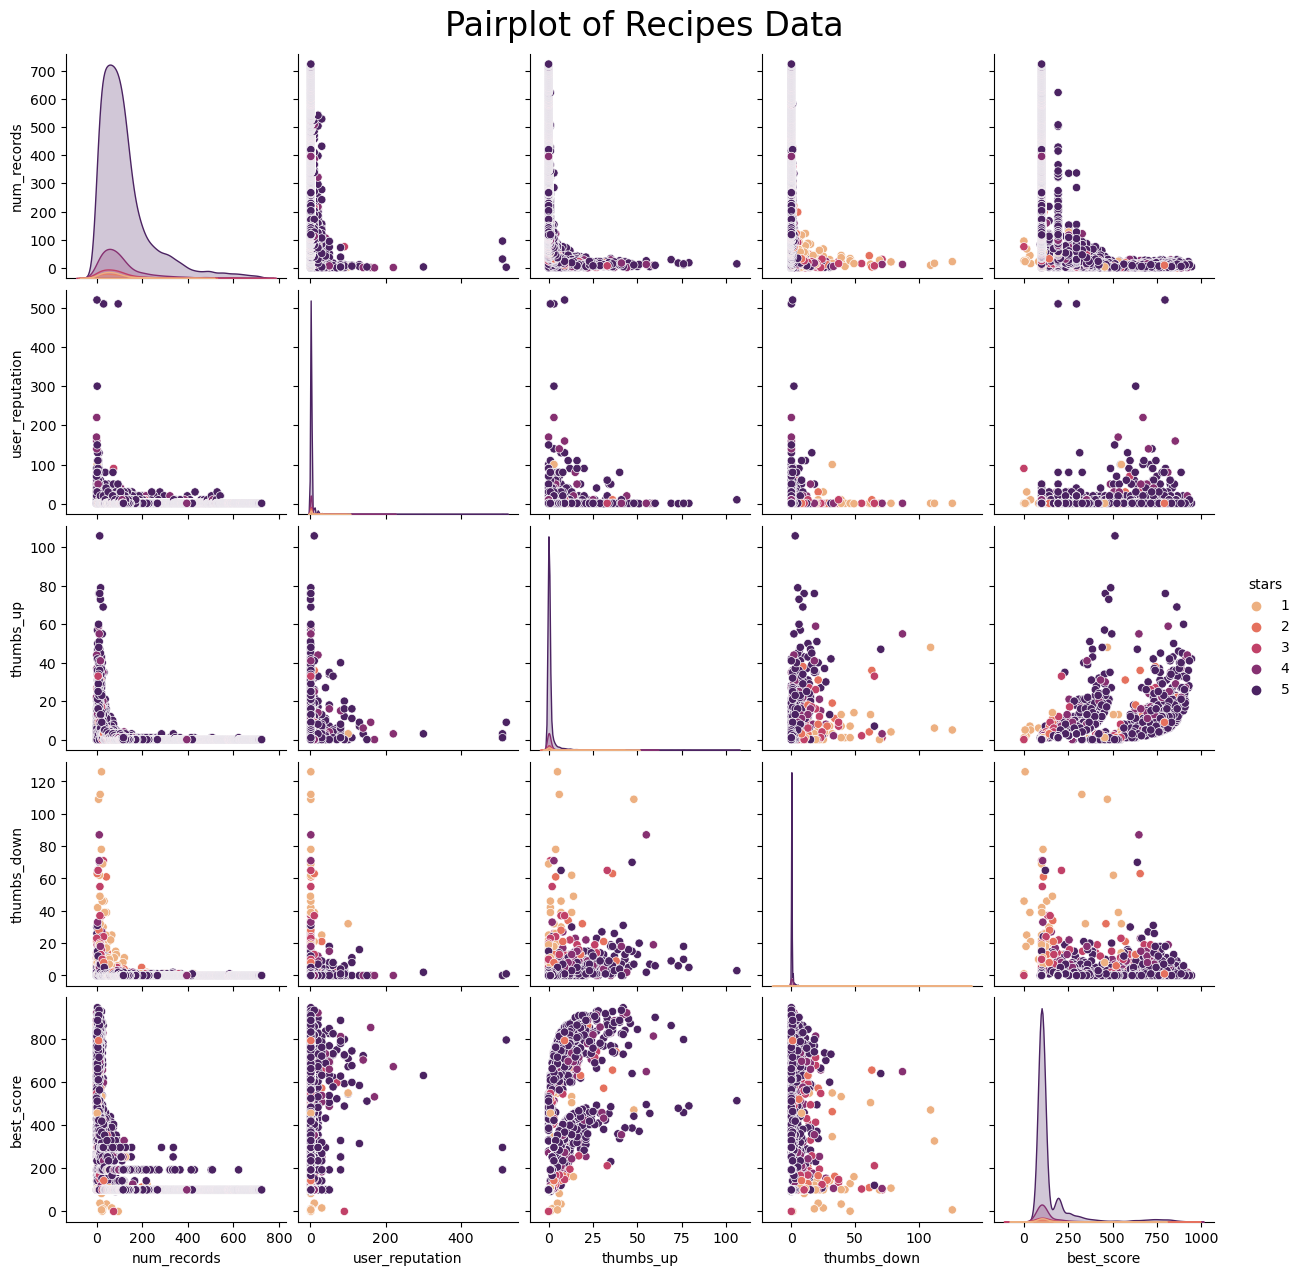

In [39]:
plt.figure()
plt.figure(figsize = (30,30))

eda = recipes.iloc[:,[0,7,9,10,11,12]]
g = sns.pairplot(eda, diag_kind = "kde", hue = 'stars', palette = 'flare')  
plt.suptitle("\n".join(["Pairplot of Recipes Data"]), fontsize = 24, y = 1.02)
plt.show()

**Summary of Figure 1: Pairplot of Recipes Data:**

Let's summarize some key items:

* **stars**: it looks as if we have a lot of 5 star ratings and much fewer 1 or 2 star ratings, as shown by the color-coding

* **user_reputation**: the reputation scores appear primarily distributed at the lower end of the scoring spectrum, but there are scores as high as 500

* **thumbs_up**: demonstrate interesting plots along with the star rating

* **best_score**: appears to be skewed to lower scores, even with 5-star ratings. Meanwhile, there also appear to be 2-star ratings on recipes with high best scores. (The best score was on the comment, as used by the site.) 

Therefore, we want to investigation the distribution of certain parameters. Neither the user_reputation or best_score columns appear helpful.  We can do one more check below before eliminating those items.

Let's first evaluate the ratings or number of stars.

In [40]:
# Count ratings 
count_ratings = dict(sorted(Counter(recipes['stars']).items()))
print("Count of ratings", count_ratings)

Count of ratings {1: 280, 2: 232, 3: 490, 4: 1655, 5: 13822}


**Figure 2**

_Count of Ratings in Recipes Data_

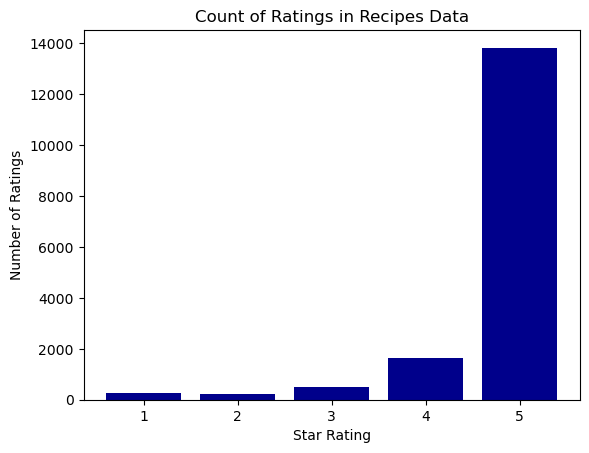

In [41]:
# Plot count of ratings
plt.bar(count_ratings.keys(), height = count_ratings.values(), color = 'darkblue')
plt.title("Count of Ratings in Recipes Data")
plt.xlabel("Star Rating")
plt.ylabel("Number of Ratings")
plt.show()

**Summary of Figure 2: Count of Ratings in Recipes Data**

Here we see a majority of the recipes data is comprised of 5-star ratings.  The next largest is 4-star ratings.  Clearly, a small portion of our dataset contains ratings 1 through 3.

One question that comes to mind: Did any of the recipes have zero 5-star ratings?

**Which recipes do not have 5 star ratings?**

In [42]:
df2 = recipes[['recipe_id', 'stars']]
# Check if any recipes have zero 5-star ratings
df2.loc[(df2['stars'] != 5) & (df2['stars'] == 5), :]

,recipe_id,stars


**Conclusion:** All of the recipes had some 5-star ratings.  Since the dataset contains top 100 recipes, these recipes received a lot of high scores.  

Next, let's check the star ratings compared to the "thumbs up" and "thumbs down" reactions and whether the reactions may be useful in our analysis.

**Figure 3**

_Star Ratings Compared to Reactions_

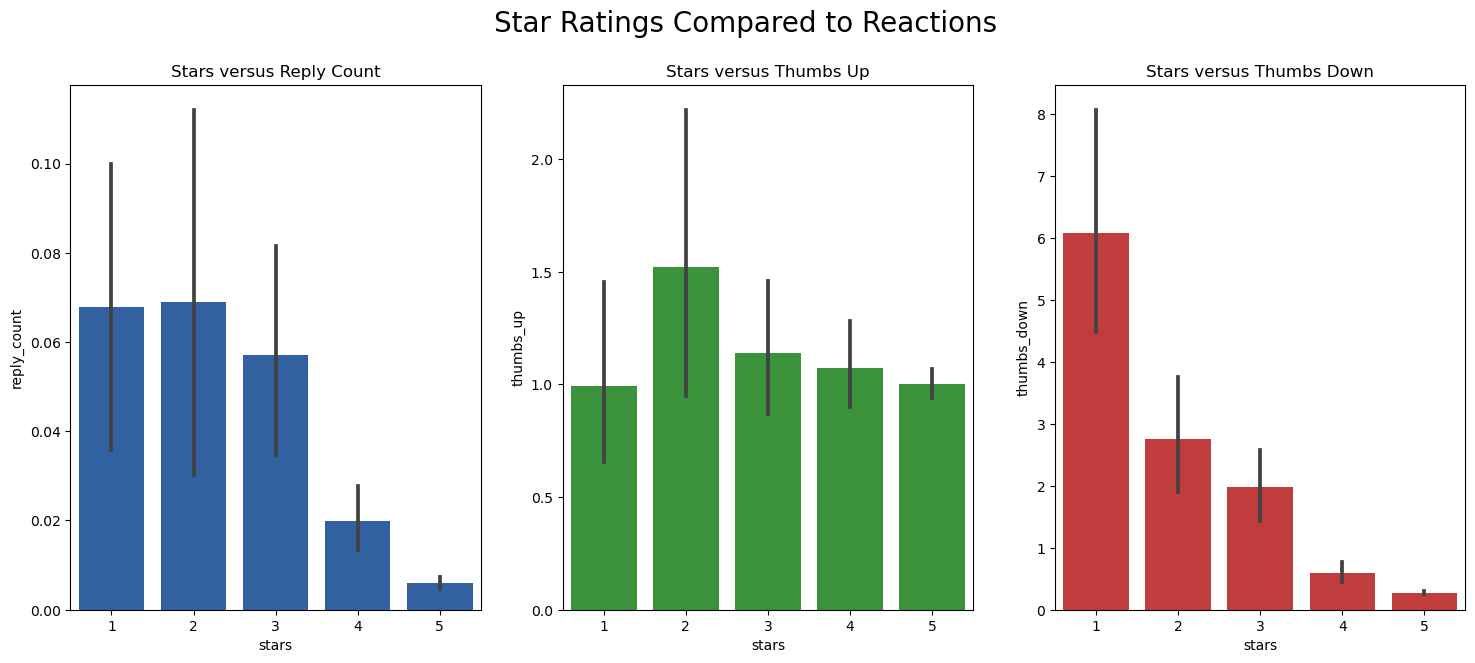

In [43]:
## Examine variables
fig = plt.figure(figsize = (18,15))

# Continuous variables
ax = fig.add_subplot(2,3,1)
sns.barplot(recipes, x = 'stars', y = 'reply_count', ax = ax, palette = sns.color_palette(['#1f5eb4']))
ax.set_title("Stars versus Reply Count")

ax = fig.add_subplot(2,3,2)
sns.barplot(recipes, x = 'stars', y = 'thumbs_up', ax = ax,palette = sns.color_palette(['#2ca02c']))
ax.set_title("Stars versus Thumbs Up")

ax = fig.add_subplot(2,3,3)
sns.barplot(recipes, x = 'stars', y = 'thumbs_down', ax = ax,palette = sns.color_palette(['#d62728']))
ax.set_title("Stars versus Thumbs Down")

plt.suptitle("\n".join(["Star Ratings Compared to Reactions"]), y = 0.93, fontsize = 20)
plt.show()

**Summary of Figure 3: Star Ratings Compared to Reactions**

Some items we notice from the segmented graphs:

* **reply_count**: Most of the replies are on the lower rated recipes

* **thumbs_up**: The largest number of thumbs_up reactions are on two star ratings

* **thumbs_down**: The largest number of thumbs_down reactions are on one star ratings

In short, while the reactions were captured regarding a comment, it's not clear how helpful this will be to our analysis of the comment itself.  Let's see if the user reputation or best score fields would help our analysis.

**Figure 4**

_User Reputation Heatmap with Best Scores_

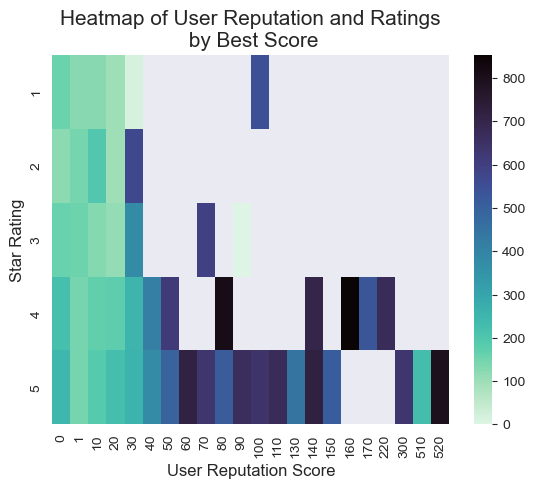

In [44]:
# User Reputation Heatmap with Best Scores
sns.set_style("dark")
recipe_matrix = recipes.pivot_table(index="stars", columns="user_reputation", values="best_score")
sns.heatmap(recipe_matrix, cmap="mako_r", annot=False, fmt="0.0f")
plt.xlabel("User Reputation Score", size = 12)
plt.ylabel("Star Rating", size = 12)
plt.title("Heatmap of User Reputation and Ratings\n by Best Score", size = 15)
plt.show()

**Summary of Figure 4: Heatmap of User Reputation and Ratings by Best Score**

From the pairplot, as well as this heatmap, it's not clear either user reputation or best score fields would help sift through relations to the star rating. Therefore, we will focus on the stars and the reviews.

Let's look at those reviews from the dataset -- specifically the words.

**Top Words in Dataset**

To get a visual perspective of the recipe reviews, we will create a word cloud displaying the top words in our dataset.  

In [45]:
# Get image
bowl_msk = np.array(Image.open("bowl_icon.png"))

#transform into array
bowl_msk_arr = np.ndarray((bowl_msk.shape[0], bowl_msk.shape[1]), np.int64)

# Helper function for word cloud where 0 is white and 255 is black
def transform_arr(arr):
    if arr == 0:
        return 255
    else: 
        return arr
    
#apply to bowl mask
for pix in range(len(bowl_msk)):
    bowl_msk_arr[pix] = list(map(transform_arr, bowl_msk[pix]))

**Figure 5**

_Word Cloud of Top Words in Recipe Reviews_

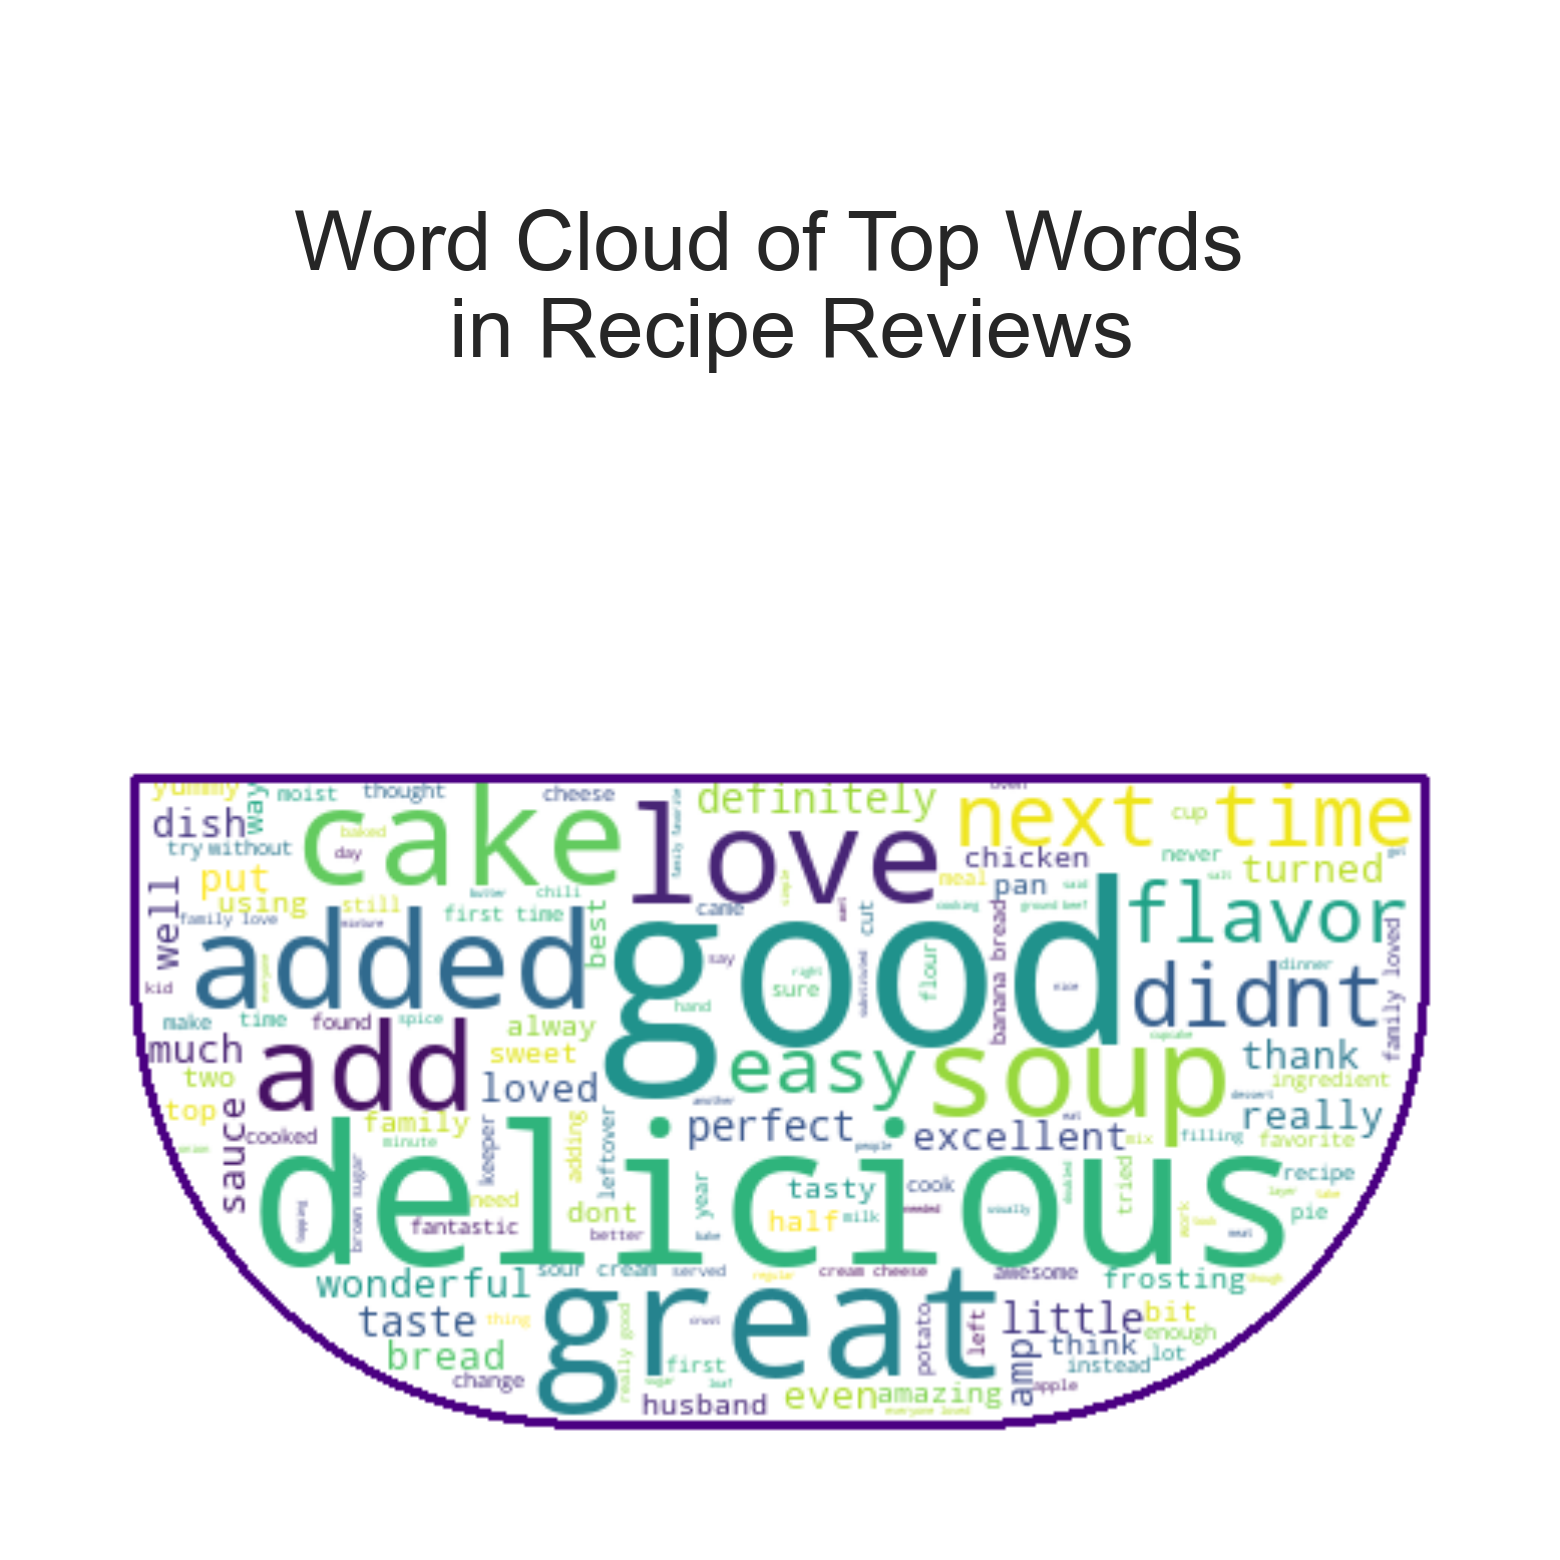

In [46]:
# Put text in usable format
recipe_text = " ".join(review for review in recipes.text)

#word cloud
bowl_wc = WordCloud(mask = bowl_msk_arr, max_words = 700, min_font_size = 4, random_state = 42, min_word_length = 3,
                   contour_width = 3, contour_color = 'indigo', background_color = 'white')

# Create bowl word cloud
bowl_wc.generate(recipe_text)

# save 
#bowl_wc.to_file("bowl_word_cloud.png")

plt.figure(figsize = [20, 20])
plt.imshow(bowl_wc, interpolation = 'bilinear')
plt.title("Word Cloud of Top Words \n in Recipe Reviews", size = 60, pad = -250)
plt.axis("off")
plt.show()

**Summary of Figure 5: Word Cloud of Top Words in Recipe Reviews**

Let's summarize some key items noticed above: 

**Positive comments:** Some of the most prominent words are positive, such as: love, good, delicious and great.

**Negative comments:** We see possibly negative words such as "didnt" and "dont".  Therefore, we should be able to sift through positive or negative reviews.  

**Two word combinations:** Also, we see some two word combinations such as "family loved" or "try without"; therefore, we can utilize different n-gram ranges in our modeling to see what works best.

Next, let's look at the word count in our dataset. We'll start with the density view, which shows us the typical length of reviews. 

**Figure 6**

_Word Count by Density in Recipes Dataset_

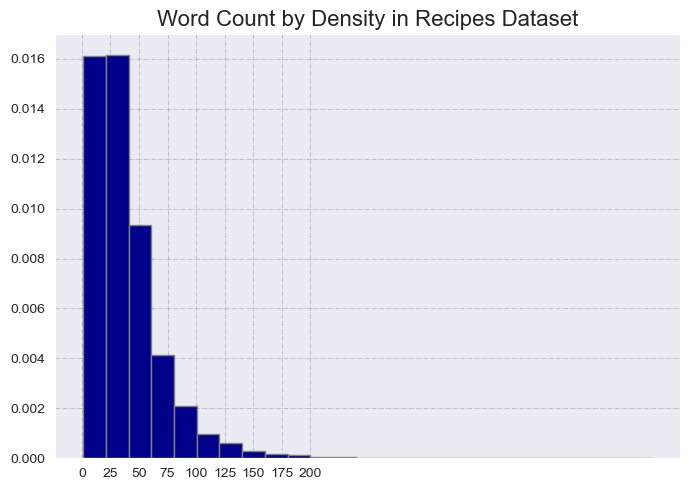

In [47]:
# plot the word count
fig, axs = plt.subplots(1,1, figsize = (7, 5))
axs.grid(color = "grey", linestyle = '-.', linewidth = 0.5, alpha = 0.6)
plt.hist(recipes['word_count'], bins = 25, density = True, color = 'darkblue', edgecolor = "gray")
plt.xticks(np.arange(0, 225, 25))
plt.title("Word Count by Density in Recipes Dataset", size = 16)
fig.tight_layout()
plt.show()

**Summary of Figure 6: Word Count by Density in Recipes Dataset**

* We see most comments contained between zero and 125 words.

* We already double checked the count after lemmatizing the text. 

Let's proceed with our plan to utilize Unsupervised Learning methods in an attempt to identify the positive or negative reviews by the text comments.  Next, a final check on the percentage of the word count by star ratings before creating our training and test data.

In [48]:
# word count by category
star_cat = recipes.groupby(['stars'], sort = True)['word_count'].sum()
print(star_cat)

stars
1     10795
2     10093
3     20957
4     70331
5    522080
Name: word_count, dtype: int64


**Figure 7**

_Word Count Percentage by Star Ratings_

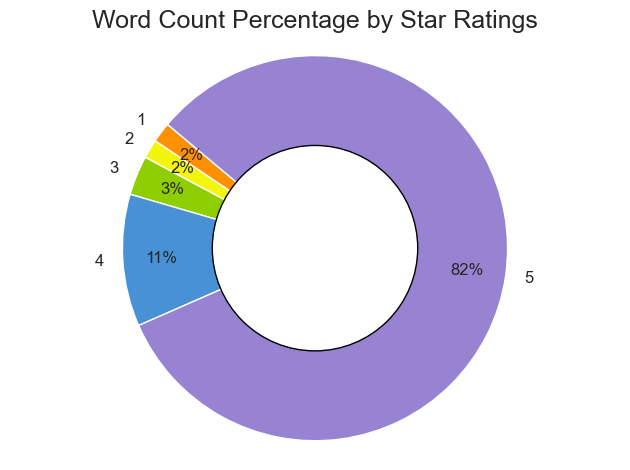

In [49]:
labels = ['1','2','3','4','5']
colors = ['#ff9100', '#f3f60a', '#8fce00', '#4791d4', '#9783d1']
plt.pie(star_cat, autopct = '%1.0f%%', colors = colors, radius = 0.75, startangle = 140,
        labels = labels, pctdistance = 0.8, labeldistance = 1.1, textprops={'fontsize': 12})
circle = plt.Circle((0,0), 0.4, color = 'black', fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.title("Word Count Percentage by Star Ratings", fontsize = "18")
plt.axis('equal')
plt.tight_layout()
plt.show()

**Summary of Figure 7: Word Count Percentage by Star Ratings**

Here we see our word count for the 5-star ratings comprises over 80% of the current dataset.  Therefore, we have a rather imbalanced dataset. Let's explore balancing options below.  Otherwise, if we were to use the dataset as it currently is segmented, we would find the best results by labeling every comment as positive -- which would comprise approximately 90-95% of our dataset (assuming 4-star and 5-star reviews are positive, as well as a number of the 3-star reviews). 

# Split Data

Let's check the number of rows in our dataset for each of the star ratings from 1 to 5.

In [50]:
# Get count by star rating
recipes.stars.value_counts()

stars
5    13822
4     1655
3      490
1      280
2      232
Name: count, dtype: int64

## Train and Test Dataframes

In [51]:
# Create train / test with just recipe_id, 'comment_id', 'text'
train_test_df = recipes[['recipe_id', 'comment_id', 'stars', 'text']]
train_test_df.head()

,recipe_id,comment_id,stars,text
0,14299,3409,5,tweaked little removed onion onion hater house italian seasoning instead oregano paprika cayenne mix little more called like everything bit more hot chili amazing easy everyone absolutely loved staple meal house
1,14299,3408,5,bush white chili bean super simple written asked please bring back
2,14299,3407,5,very complicated white chicken chili year everyone raf saw thought try easy alternative weeknight husband like better super easy delicious cut back slightly crushed oregano cayenne pepper otherwise exactly written
5,14299,3404,5,amazing boyfriend loved much going again week
6,14299,3331,5,wow excellent written only change oz jar great northern bean taste good right amount heat


In [52]:
train_test_df.iloc[:, [2,3]].query('stars == 1 | stars == 2').sample(8, random_state = 5)

,stars,text
9363,1,didnt enjoy texture taste dessert kid liked
4256,1,disaster too long cooking waste time money
17133,1,taste ok very messy crumblywould not again
1936,2,result exactly like baconflavored block cheese not recommend
16708,2,didnt high fat content ingredient scared away bacon type cheese sour cream im sure yummy not good
11623,1,bake minute longer direction still not fully cooked worst gluten free banana bread ever cooked many different gluten free recipies pretty much fantastic didnt relize possible heavy gooey mess
6461,1,experienced baker cake le disappointing middle completely raw sank middle mch looked like giant crater throw outand start cooked long edge getting burnt dont bake cake
16601,1,too eggy egg run center pan solutiononly unfrozen coconutremove egg add bit condensed milk


**Note:** The comments on the 1-star and 2-star ratings appear to primarily indicate people who were disappointed in the recipe or thought it was terrible.  Therefore, let's consider those users as "not a fan" of the recipe.  Then, let's check those with 3 stars.

In [53]:
# Sample of recipes with 3 stars
train_test_df.iloc[:, [2,3]].query('stars == 3').sample(5, random_state = 5)

,stars,text
10114,3,ok need double sauce half parsley hubby not like
16976,3,think would fun kid meatball take fun spiky porcupine look cook only found ok taste think next time would still meatball rice try different sauce
3365,3,pie taste excellent runny went back see missed anything hadnt idea apple soft still shape
9847,3,outer edge casserole bit crispy tortilla bake minute great time saving need dinner table fast like southwestern food would good try out suggest baking minute longer outer edge tortilla crispy
14368,3,more soup maybe try again extra bean mashed thicken need little more something great base start


**Note:** These folks sound like a mix of fans and not fans.

We want to create a balanced dataset of the "fans" and "not fans".  Therefore, let's allocate the 1-star and 2-star ratings to "not fans" and 3-star ratings or above will be denoted as "fans".

To make this simple, we will create a "is_fan" column where all fans will be marked with a '1'.  Then, the "not fans" would be represented by a '0'.

Since we have significantly more "fans" than "not fans" let's make sure the size of our "fans" (1) is comparable to the "not fans" (0).  In order to keep this similar to the original dataset, we will sample from the 3-5 star reviews proportionally.

## Balance Data

In [54]:
# Get proportions of ratings
threes_wt = len(recipes.query('stars == 3'))/len(recipes.query('stars >= 3'))
fours_wt = len(recipes.query('stars == 4'))/len(recipes.query('stars >= 3'))
fives_wt = len(recipes.query('stars == 5'))/len(recipes.query('stars >= 3'))

# Create balanced data set
ones_twos = train_test_df.loc[train_test_df['stars'] <= 2,:]

threes_sub = train_test_df.loc[train_test_df['stars'] == 3,:]
threes_size = len(ones_twos)*threes_wt
threes_sample = threes_sub.sample(int(threes_size), random_state = 42)

fours_sub = train_test_df.loc[train_test_df['stars'] == 4,:]
fours_size = len(ones_twos)*fours_wt
fours_sample = fours_sub.sample(int(fours_size), random_state = 42)

fives_sub = train_test_df.loc[train_test_df['stars'] == 5,:]
fives_size = len(ones_twos)*fives_wt
fives_sample = fives_sub.sample(int(fives_size), random_state = 42)

# create sample df with above
sample_df = pd.concat([ones_twos, threes_sample, fours_sample, fives_sample])

#check head
sample_df.head()

,recipe_id,comment_id,stars,text
80,14299,3669,1,description say maybe cream cheese cream cheese ingredient say sour cream whipping cream not cream cheese
98,14299,3505,1,terrible followed exactly tasted fine added sour cream whipping cream turned thin white flavorless soup not bother
108,14299,3385,2,more like soup hearty chili call way too much chicken stock half amount would more enough chili never thickens no matter long cook again should called soup not chili way better chili recipe out wont again
130,14299,3161,2,good
143,14299,3283,1,im always amazed people rate state changed significantly reading comment read im not sure whether even try people cant without changing beyond know real like even begin rate


In [55]:
#Create 'is_fan' column where 1 is fan and 0 is not
sample_df['is_fan'] = (sample_df['stars'] >= 3).astype(int)

#check
sample_df.is_fan.value_counts()

is_fan
0    512
1    511
Name: count, dtype: int64

In [56]:
# check info
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 80 to 16047
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   recipe_id   1023 non-null   int64 
 1   comment_id  1023 non-null   int64 
 2   stars       1023 non-null   int64 
 3   text        1023 non-null   object
 4   is_fan      1023 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 48.0+ KB


In [57]:
# Focus on comment id, text and stars to confirm our assessment
X = sample_df[['comment_id','text']].copy()
y = sample_df[['is_fan']].copy()  #just keep is_fan

In [58]:
# split into train and validation sets, shuffle the data, set random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                        shuffle = True, random_state=42)

In [59]:
# Confirm x,y data sets of equal length
print("Length of training data, x:", len(X_train), "y:", len(y_train))
print("Length of test data, x:", len(X_test), "y:", len(y_test))

Length of training data, x: 716 y: 716
Length of test data, x: 307 y: 307


**Note:** Since this balanced dataset only utilizes approximately 7% of our clean data, let's create a slightly larger data subset we can use for a couple examples -- in case the model does not perform well on such a small amount of data.

### Larger Data Subset

Here we can use the same format as before, but we'll make the "fans" category 50% larger than "not fans".  All of the one and two star reviews were already used for "not fans"; therefore, the only data we have to increase the size of the subset is from the "fans" category.

In [60]:
# increase threes_wt
threes_size2 = len(ones_twos)*threes_wt*1.5
threes_sample2 = threes_sub.sample(int(threes_size2), random_state = 42)

# increase fours_wt
fours_size2 = len(ones_twos)*fours_wt*1.5
fours_sample2 = fours_sub.sample(int(fours_size2), random_state = 42)

#increase fives_wt
fives_size2 = len(ones_twos)*fives_wt*1.5
fives_sample2 = fives_sub.sample(int(fives_size2), random_state = 42)

# create sample df2 with above
sample_df2 = pd.concat([ones_twos, threes_sample2, fours_sample2, fives_sample2])

#Create 'is_fan' column where 1 is fan and 0 is not
sample_df2['is_fan'] = (sample_df2['stars'] >= 3).astype(int)

#check
sample_df2.is_fan.value_counts()

is_fan
1    766
0    512
Name: count, dtype: int64

In [61]:
# Focus on comment id, text and stars to confirm our assessment
X2 = sample_df2[['comment_id','text']].copy()
y2 = sample_df2[['is_fan']].copy()  #just keep is_fan

# split into train and validation sets, shuffle the data, set random state for reproducibility
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, 
                                                        shuffle = True, random_state=42)

In [62]:
# Confirm x,y data sets of equal length
print("Length of training data, x2:", len(X_train2), "y2:", len(y_train2))
print("Length of test data, x2:", len(X_test2), "y2:", len(y_test2))

Length of training data, x2: 894 y2: 894
Length of test data, x2: 384 y2: 384


**Summary:** Now we have a second, larger data subset for our models.  As we can see by the lengths of the training and test data, we still are using less than 10% of our clean data set.  

Next, let's move onto Unsupervised Learning.

# Unsupervised Learning

Text requires conversion into numerical formats for modeling.  Therefore, we use vectorizers to convert our text documents into a format we can model.  Below we will explore several different vectorizers to see the impact they have on our results.  Three vectorizers that we will investigate are:

* Word2Vec

* TfidfVectorizer

* CountVectorizer

Each vectorizer offers unique strengths and drawbacks to their usage.  We will highlight some of those points below.


## Helper function for USL models

Next, we'll simply insert our helper function from our previous efforts to return the best accuracy score on our Unsupervised Learning models.  We also inserted a custom score function to use with Randomized Search Cross Validation, as well as label_permute_compare to return the accuracy score.

In [63]:
def label_permute_compare(ytdf,yp,n=2): 
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    # your code here
    lab_true = ytdf.apply(lambda y: pd.factorize(y)[0])
    lab_pred = yp

    best_acc = 0
    best_ord = ()

    for p in itertools.permutations(range(n)):
        p = np.array(p)
        p_ord = p[lab_pred]
        p_acc = accuracy_score(lab_true, p_ord)

        if p_acc > best_acc:
            best_acc = p_acc
            best_ord = p

    return tuple(best_ord), round(best_acc, 3)


def custom_acc_score(estim, xt, yt):
    x_trans = estim.transform(xt)
    y_predicts = np.argmax(x_trans, axis = 1)
    best_ord, best_acc = label_permute_compare(yt, y_predicts)
    return best_acc

## Utilizing Word2Vec Vectorizer

Gensim offers an open source library for vectorizing documents.  Here we will utilize Gensim's Word2Vec to explore our text. It provides some interesting capabilities, such as:

* identifying similarity between two words

* returning a list of most similar words

* identifying words least similar to others

These capabilities are considered part of Gensim's unsupervised algorithms and Word2Vec can identify the relationships between documents or words.  Let's explore those capabilities below with our entire cleaned, stemmed and lemmatized recipes text. 

A summary of the Word2Vec parameters below:

* **vector_size:** the number of values in the word vector output by the model.  Typically, the value utilized ranges from 100 to 1000.

* **window:** sets the number of words in the training window, which is a sliding window

* **min_count:** we use 3 initially to capture all words that occur at least 3 times

* **workers:** initially use 1 thread to train the model for reproducibility (where a higher number will execute faster)

In [1697]:
# Put recipe text in usable format
sentences = [row.split() for row in recipes['text']]

# Set up model
w2v_model = Word2Vec(sentences, vector_size = 100, window = 5, min_count = 3, workers = 1)

word_vectors = w2v_model.wv

#save our word vectors
word_vectors.save("word2vec.wordvectors")

#load our word vectors 
wv = KeyedVectors.load("word2vec.wordvectors", mmap = 'r')

# Get vector of a word
vector = wv['chicken']
print("Portion of vector:", vector[0:10,])

Portion of vector: [ 0.09311766  0.6406411   1.1520818   0.6895083   0.41714492 -1.4655505
  0.5247735  -1.1541626  -1.0043604  -0.6418499 ]


**Note:** The vector size was set to 100 above; therefore, the output for a word is an array of 100 values.  Since this output contains negative values, we cannot use the output in its current form with a non-negative matrix factorization model.  The output would need to be normalized first.  

One benefit of Word2Vec are the capabilities to query for topical similarity.  The similarity measures are calculated based on cosine similarity.  The scores returned by the model range from -1 to 1 where a score closer to 1 indicates higher degree of similarity.  

Let's see how this works on our recipe reviews below.

**Check similarity scores between 2 words**

Let's check the similarity scores between some of the positive words in our recipe reviews.

In [1698]:
print("The similarity between 'good' and 'great' is", round(w2v_model.wv.similarity('good', 'great'),4))
print("The similarity between 'good' and 'delicious' is", round(w2v_model.wv.similarity('good', 'delicious'),4))
print("The similarity between 'delicious' and 'yummy' is", round(w2v_model.wv.similarity('delicious', 'yummy'),4))

The similarity between 'good' and 'great' is 0.6779
The similarity between 'good' and 'delicious' is 0.668
The similarity between 'delicious' and 'yummy' is 0.8057


**Summary:**
Here we see a probability score for the similarity between the two positive words.  The most similar were delicious and yummy.

Let's see how some of the negative comments scored.

In [1699]:
print("The similarity between 'terrible' and 'horrible' is", round(w2v_model.wv.similarity('terrible', 'horrible'),4))
print("The similarity between 'bad' and 'awful' is", round(w2v_model.wv.similarity('bad', 'awful'),4))

The similarity between 'terrible' and 'horrible' is 0.9807
The similarity between 'bad' and 'awful' is 0.9626


**Summary:** Here we see much stronger scores for the negative comments being identified as similar. 

We can also get a list of words identified as most similar based on the similarity score.  Let's try that below.

**What are the top 3 words similar to 'meal'?**

In [1700]:
# Top words similar to 'meal'
b = w2v_model.wv.most_similar('meal', topn = 3)
b_dict = dict(b)
b_res = {key: round(b_dict[key], 4) for key in b_dict}
print("Top 3 words similar to 'meal'", b_res)

Top 3 words similar to 'meal' {'dinner': 0.8991, 'breakfast': 0.896, 'staple': 0.8804}


**Which of the words does not match the others?**

Let's try an example below.

In [1701]:
# which word does not match
w2v_model.wv.doesnt_match(['cake', 'pie', 'chili'])

'chili'

Let's see what the similarity score was for cake and chili or pie and chili, so we understand how the model makes the selection.

In [1702]:
# Check the similarity scores
print("Similarity score between cake and pie:", round(w2v_model.wv.similarity('cake', 'pie'),4))
print("Similarity score between pie and chili:", round(w2v_model.wv.similarity('pie', 'chili'),4))
print("Similarity score between cake and chili:", round(w2v_model.wv.similarity('cake', 'chili'),4))

Similarity score between cake and pie: 0.6404
Similarity score between pie and chili: 0.1191
Similarity score between cake and chili: -0.2504


**Summary:**  In the example above, Word2Vec's model successfully identified which word did not match the others in the list. The similarity scores provide insight to the item selected as **not** matching the other words.  Clearly, cake and pie had the highest similarity score. The similarity score for pie and chili was close to zero. In the case of cake and chili, the similarity score was actually negative. 

**Which recipes would be recommended most similar to 'cake'?**

In [1720]:
# Top words similar to 'cake'
ck = w2v_model.wv.most_similar('cake', topn = 1)
# Look up recipes 
recommend = recipes.loc[recipes['recipe_name'].str.contains(ck[0][0], case = False)]
print("Recipe recommendations are:", list(recommend['recipe_name'].unique()))

Recipe recommendations are: ['Pumpkin Spice Cupcakes with Cream Cheese Frosting', 'Zucchini Cupcake']


**Summary:** For the three most similar words, Word2Vec did a relatively good job on the example of identifying similar items.  

The dataset did not contain a category for "entrees" or "desserts", which is how a user may search for recipes.  However, the similarity results from 'cake' show how this tool could be used to make recipe recommendations. Our primary focus is not a Recommender System, though, so let's move onto other vectorizers and their usage in models.

Next, let's investigate two other vectorizers, TfidfVectorizer and CountVectorizer to see how successful they are with analyzing this text.

## Tfidf Vectorizer and Count Vectorizer Overview

Since we have text documents, we need to vectorize the text into numbers for our modeling. There are a number of different vectorizers, as we just saw an example using Word2Vec above.  Two other commonly used vectorizers are scikit-learn's TfidfVectorizer and CountVectorizer.  We utilize a tool called T-Distributed Stochastic Neighbor Embedding (TSNE) to help visualize the difference in output from these two vectorizers.  Let's briefly explain each vectorizer then execute the visualization.  

**Tfidf Vectorizer Overview**

We use scikit-learn's TfidfVectorizer for feature extraction.  "Tfidf" stands for Term Frequency-Inverse Document Frquency.  As expected, "term frequency" measures the frequency a term is found in a document. The "inverse document frequency" adjusts the weighting for terms inverse to the frequency of their occurrence.  In other words, a less frequent term would be assigned a greater weight -- meanwhile, a very frequent term would be assigned a lower weight.

**Count Vectorizer Overview**

Another vectorizer available from scikit-learn is CountVectorizer.  CountVectorizer does not place weighting on the words.  This method essentially encodes a vector into a zero or one if the word exists in the document -- in our case, this would be the recipe review.

**TSNE Overview**

TSNE is another tool available through scikit-learn. This tool can be used to visualize the dimensionality of data.  In our case, we will be using "is_fan" which is binary and two dimensional -- as opposed to other datasets which could have many more dimensions.  

However, an interesting item depicted via the TSNE plots below are the contrasting results from our vectorizers.  Furthermore, initial inspection of the word cloud in Figure 5, indicated two word items such as, "very good".  Therefore, we display the different vectorizers with n-gram ranges of (1,1) and (1,2) below. The "n-gram range" refers to the number of adjacent words to be considered where (1,1) is one word and (1,2) also includes two words. The TSNE plots are not necessarily conclusive. This visualization is simply one tool to help us assess parameters used in the models below.

### TSNE with Tfidf Vectorizer and CountVectorizer

Let's view a 4-way plot with TfidfVectorizer using n-gram (1,1) and (1,2) then similarly with CountVectorizer using n-gram (1,1) and (1,2).  This visualization provides an interesting depiction of the differences with the 2 vectorizers and the n-gram parameter.

**Figure 8**

_Visualization of Categories on 2-Dimensional Plot Using TfidfVectorizer and CountVectorizer_

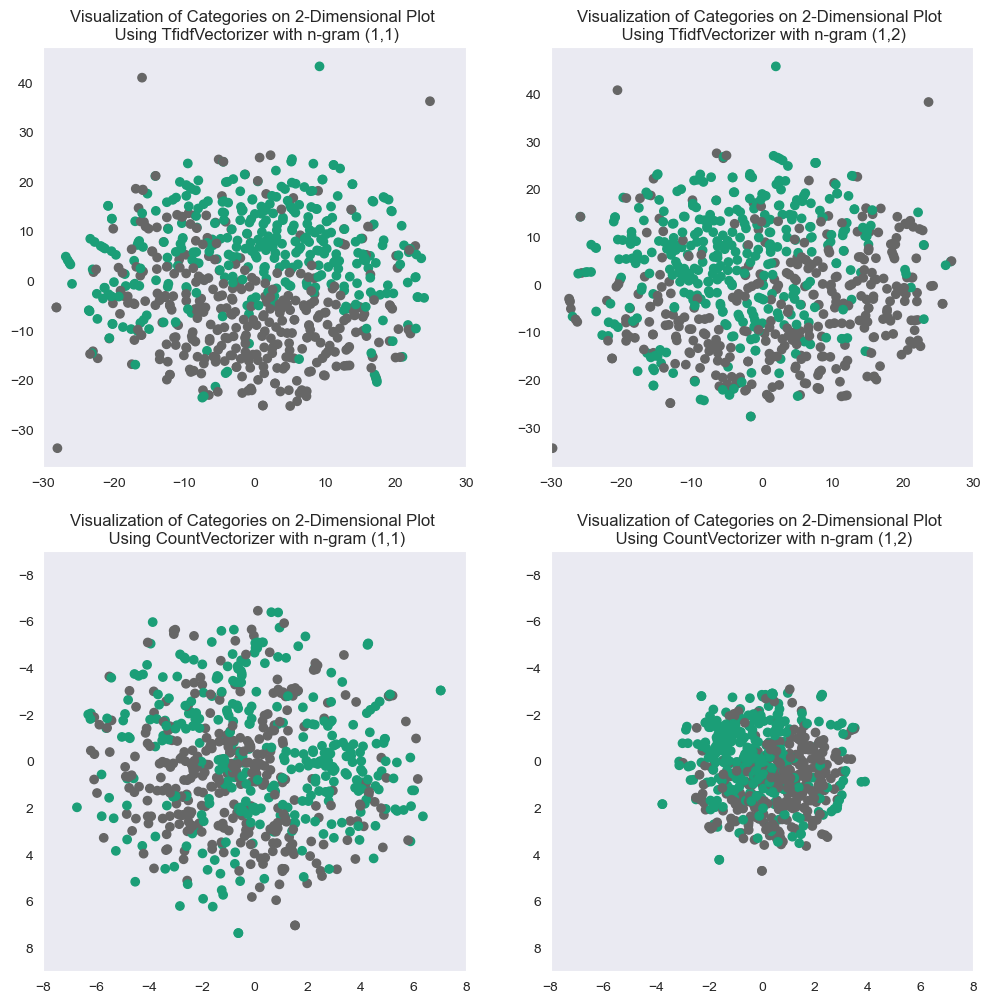

In [64]:
# Visualization of the vectorized data using TSNE (T-distributed Stochastic Neighbor Embedding)
fig, ([ax0, ax1], [ax2, ax3]) = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))

# Tfidf vectorizer with ngram of (1,1)
tfidf_vec = TfidfVectorizer(ngram_range = (1,1))

# Transform text 
doc_tftrans = tfidf_vec.fit_transform(X_train['text'])

# n_components is for 2D plot
tsne_mod = TSNE(n_components = 2, init = "random", learning_rate = 'auto', n_iter = 500, random_state = 42)
tsne_tfmod_ft = tsne_mod.fit_transform(doc_tftrans)
ax0.scatter(tsne_tfmod_ft[:, 0], tsne_tfmod_ft[:, 1], c = y_train['is_fan'].astype('category').cat.codes, cmap = 'Dark2')
ax0.set_title("Visualization of Categories on 2-Dimensional Plot \n Using TfidfVectorizer with n-gram (1,1)")
ax0.set_xlim(-30, 30)

# Tfidf vectorizer with ngram of (1,2)
tfidf_vec2 = TfidfVectorizer(ngram_range = (1,2))

# Transform text 
doc_tftrans2 = tfidf_vec2.fit_transform(X_train['text'])

# Visualization of the vectorized data using TSNE, n_components is for 2D plot
#tsne_mod = TSNE(n_components = 2, init = "random", learning_rate = 'auto', n_iter = 500, random_state = 42)
tsne_tfmod2_ft = tsne_mod.fit_transform(doc_tftrans2)
ax1.scatter(tsne_tfmod2_ft[:, 0], tsne_tfmod2_ft[:, 1], c = y_train['is_fan'].astype('category').cat.codes, cmap = 'Dark2')
ax1.set_title("Visualization of Categories on 2-Dimensional Plot \n Using TfidfVectorizer with n-gram (1,2)")
ax1.set_xlim(-30, 30)

## COUNT VECTORIZER --------------------
# Count vectorizer with ngram of (1,1)
count_vec = CountVectorizer(analyzer = 'word', ngram_range = (1,1))

# Transform text 
X_train_ctrans = count_vec.fit_transform(X_train['text'])

# n_components is for 2D plot
#tsne_mod = TSNE(n_components = 2, init = "random", learning_rate = 'auto', n_iter = 500, random_state = 42)
tsne_cvmod_ft = tsne_mod.fit_transform(X_train_ctrans)
ax2.scatter(tsne_cvmod_ft[:, 0], tsne_cvmod_ft[:, 1], c = y_train['is_fan'].astype('category').cat.codes, cmap = 'Dark2')
ax2.set_title("Visualization of Categories on 2-Dimensional Plot \n Using CountVectorizer with n-gram (1,1)")
ax2.set_xlim(-8,8)
ax2.set_ylim(9,-9)

# Count vectorizer with ngram of (1,2)
count_vec2 = CountVectorizer(analyzer = 'word', ngram_range = (1,2))

# Transform text 
X_train_ctrans2 = count_vec2.fit_transform(X_train['text'])

# Visualization of the vectorized data using TSNE, n_components is for 2D plot
#tsne_mod = TSNE(n_components = 2, init = "random", learning_rate = 'auto', n_iter = 500, random_state = 42)
tsne_cvmod2_ft = tsne_mod.fit_transform(X_train_ctrans2)
ax3.scatter(tsne_cvmod2_ft[:, 0], tsne_cvmod2_ft[:, 1], c = y_train['is_fan'].astype('category').cat.codes, cmap = 'Dark2')
ax3.set_title("Visualization of Categories on 2-Dimensional Plot \n Using CountVectorizer with n-gram (1,2)")
ax3.set_xlim(-8, 8)
ax3.set_ylim(9,-9)
plt.show()

**Summary of Figure 8: Visualization of Categories on 2-Dimensional Plot using TfidfVectorizer and CountVectorizer**

Above we see the different colors denoting our "is fan" or "not a fan" categories for the recipe reviews.  In all of the plots, we see some intermingling of the colors, which may indicate there is not an entirely clean separation of the two.  

An interesting item to note is what happens when we change the vectorizer's n-gram range.  The same TSNE plot with TfidfVectorizer using an n-gram range of (1,1) yields a different grouping than n-gram of (1,2).  There are also different groupings with the CountVectorizer (1,1) and (1,2) plots.  Although, it's not clear whether the n-gram of (1,2) does a better job distinguishing the two categories. The TfidfVectorizer and CountVectorizer plots have different scales, otherwise, the CountVectorizer plot is not viewable.


**Note: The key takeaway is we want to investigate the impact of various vectorizers and n-gram ranges on our models below.** 

Let's move onto the models.  We will start with Clustering methods and then view Matrix Factorization.

## Clustering Methods

For this example, we do need to vectorize the text.  Therefore, we will use TfidfVectorizer.  To summarize, below are the parameters we will explore.

**TfidfVectorizer parameters**

* **max_df:** maximum document frequency set to 0.75 which can help eliminate common words found in all documents.

* **min_df:**  minimum document frequency set to an integer of 6 to alleviate outliers

* **ngram_range:** the number of adjacent words to be considered where (1,2) includes two word combinations.

We will explore more variations of parameters in other models below.


### K-Means Clustering

In [65]:
# Utilize TfidfVectorizer
tf_vec = TfidfVectorizer(max_df = 0.75, min_df = 6, ngram_range = (1,2))   

In [66]:
# transform doc
doc_tf_train = tf_vec.fit_transform(X_train['text'])
doc_tf_test = tf_vec.transform(X_test['text'])

In [67]:
# K-Means
km = KMeans(n_clusters = 2, init = "k-means++", n_init = "auto", max_iter = 200, 
            algorithm = "elkan", random_state = 101)  

time0 = time()
km.fit(doc_tf_train)
km_time = time() - time0

print("KMeans time:", round(km_time, 4), "seconds")

labelorder_km, acc_km = label_permute_compare(y_train, km.labels_)
print("Accuracy of K-Means:", acc_km)

KMeans time: 0.0121 seconds
Accuracy of K-Means: 0.767


In [68]:
# Predict and accuracy
yp_km = km.predict(doc_tf_test)
labelorder_km_test, acc_km_test = label_permute_compare(y_test, yp_km)
print("Accuracy of K-Means on test:", acc_km_test)

Accuracy of K-Means on test: 0.808


### Agglomerative Clustering

In [69]:
agc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')  

time0 = time()
agc.fit(doc_tf_train.toarray())
agc_time = time() - time0

print("AGC time:", round(agc_time, 4), "seconds")

labelorder_agc, acc_agc = label_permute_compare(y_train, agc.labels_)
print("Accuracy of AGC:", acc_agc)

AGC time: 0.0716 seconds
Accuracy of AGC: 0.679


In [70]:
yp_agc = agc.fit_predict(doc_tf_test.toarray())
labelorder_agc_test, acc_agc_test = label_permute_compare(y_test, yp_agc)
print("Accuracy of AGC on test:", acc_agc_test)

Accuracy of AGC on test: 0.645


**Note:** Given that we saw a wide disparity in the Agglomerative Clustering results, depending on the parameters, let's cycle through a few and see if we can get better results.

In [71]:
# Agglomerative Clustering link 

n_clusters = 2
linkage_list = ['complete', 'average', 'single']
metric_list = ['l1', 'l2', 'manhattan']
data = doc_tf_train.toarray()

for link, metric in itertools.product(linkage_list, metric_list):
    mod = AgglomerativeClustering(n_clusters = 2, metric = metric, linkage = link)
    mod.fit(data)

    lab_ord, mod_acc = label_permute_compare(y_train, mod.labels_)

    print("Metric:", metric, ", Link:", link, "Model Accuracy:", mod_acc)

Metric: l1 , Link: complete Model Accuracy: 0.529
Metric: l2 , Link: complete Model Accuracy: 0.518
Metric: manhattan , Link: complete Model Accuracy: 0.529
Metric: l1 , Link: average Model Accuracy: 0.508
Metric: l2 , Link: average Model Accuracy: 0.508
Metric: manhattan , Link: average Model Accuracy: 0.508
Metric: l1 , Link: single Model Accuracy: 0.508
Metric: l2 , Link: single Model Accuracy: 0.508
Metric: manhattan , Link: single Model Accuracy: 0.508


**Summary:**  Those are definitely not better results.  Let's explore our results with matrix factorization.

## Matrix Factorization Methods

### Using Tfidf Vectorizer

Typically, TfidfVectorizer is faster than CountVectorizer and we already expect some slower performance with matrix factorization.  Therefore, we will start with TfidfVectorizer and can run a comparison later with CountVectorizer in a Supervised Learning model.  We create a pipeline with the vectorizer and classifier then utilize Randomized Search Cross Validation to identify the best parameters.

To summarize, below are the parameters we will explore:
* **max_df:** maximum document frequency set to 0.50 and 0.75 initially, which can help eliminate common words found in all documents.

* **min_df:**  minimum document frequency set to an integer of 3, 4, and 5 initially to alleviate outliers

* **ngram_range:** the number of adjacent words to be considered where (1,1) is one word, (1,2) includes two words and (1,3) includes three words.  Upon initial inspection, the word cloud of the top words included some two word items such as, "very good". Also, we saw in the TSNE plots there were different results from our vectorizers using different n_gram ranges. Therefore, we use the ngram_ranges of (1,1), (1,2) and (1,3) below.

* **norm:** normalization ensures the sum of normalized scores in the document equate to one. Normalization may improve our results, since our documents were of different length.  We use l1 and l2 normalization below. As per sklearn, for 'l1' normalization, each vector is normalized such that the sum of absolute values equates to one. For 'l2' normalization, it is the sum of squares that equates to one.

* **stop_words:** set to english or None -- 'english' may remove words not eliminated when we lemmatized, yet add little value to the text analysis.  

### NMF with Coordinate Descent

We will build a pipeline with TfidfVectorizer and the NMF model with solver = 'cd' for coordinate descent and a beta_loss of 'frobenius'. This model should execute quickly, but we also want to attain a decent accuracy score.

To summarize the parameters explored for NMF with coordinate descent, those include:

* **n_components:** the number of components was set to 2, since we have 2 categories of articles (this number is typically not known with Unsupervised Learning; however, it is known for this dataset)

* **solver:** 'cd' represents coordinate descent, which uses an alternating least squares calculation for convergence.

* **beta_loss:** the beta_loss of frobenius is used with coordinate descent solver.  This loss utilizes a sum of squares approach, similar to the Euclidean distance calculation.

* **max_iter:** the maximum number of iterations for this model to run.  In the pipeline, we set the maximum number of iterations at 2500 to ensure convergence.  Typically, the model executes faster with fewer iterations.

* **init:** the initialization method of which we investigate the options: NNDSVD (Non-Negative Double Singular Value Decomposition), Non-Negative Double Singular Value Decomposition Average, and Random.  Typically, NNDVSD is expected to be more suitable for sparse matrix, whereas NNDSVDA replaces zeros with an average and; therefore, may be more suitable when a sparse matrix is not preferred. A random initialization can scale the zero values.

* **tol:** the tolerance indicating the threshold at which to stop the iterations

* **l1_ratio:** addresses the ratio of l1 to l2 penalty in regularization of the data.  The parameter is set between 0 to 1 -- where 0 is a l2 penalty and 1 is a l1 penalty.  A value in between denotes the ratio of the two penalties.

Let's see what the results are from our Randomized Search Cross Validation below.

In [664]:
# build pipeline 
pipe_nmfcd = Pipeline([("vect", TfidfVectorizer()), ("clf", NMF(n_components = 2, solver = 'cd', beta_loss = 'frobenius', max_iter = 2500))])
pipe_nmfcd

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf', NMF(max_iter=2500, n_components=2))])

In [1024]:
# parameter grid
param_nmfcd = {
    "vect__max_df": (0.50, 0.75),
    "vect__min_df": (3, 4, 5, 7),
    "vect__ngram_range": ((1, 1), (1, 2), (1,3)),  
    "vect__norm": ("l1", "l2"), 
    "vect__stop_words": ('english', None),
    "clf__init": ('nndsvd', 'nndsvda','random', None),
    "clf__tol": (1e-4, 1e-5, 1e-6),
    "clf__l1_ratio": (0.0, 0.5, 1.0),
}

In [1025]:
# Randomized Search CV
rand_nmfcd = RandomizedSearchCV(estimator = pipe_nmfcd, param_distributions = param_nmfcd,
    n_iter = 300, error_score = 'raise', refit = True, n_jobs = 2, random_state = 42, verbose = 0,cv = 5,scoring = custom_acc_score);

In [1026]:
# fit and check time ... use text data 
t0 = time()
rand_nmfcd.fit(X_train['text'], y_train)
print(f"Done in {time() - t0:.3f}s")

Done in 20.300s


In [1028]:
# View the top results
pd.set_option("max_colwidth", 200)
best_nmfcd_params = pd.DataFrame(rand_nmfcd.cv_results_)
best_nmfcd_params[['params', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False).head()

,params,mean_test_score
120,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 3), 'vect__min_df': 4, 'vect__max_df': 0.5, 'clf__tol': 1e-06, 'clf__l1_ratio': 1.0, 'clf__init': None}",0.8142
238,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 3), 'vect__min_df': 4, 'vect__max_df': 0.75, 'clf__tol': 1e-06, 'clf__l1_ratio': 0.5, 'clf__init': 'nndsvd'}",0.8142
281,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 2), 'vect__min_df': 5, 'vect__max_df': 0.5, 'clf__tol': 1e-05, 'clf__l1_ratio': 1.0, 'clf__init': 'random'}",0.8098
251,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 2), 'vect__min_df': 3, 'vect__max_df': 0.5, 'clf__tol': 0.0001, 'clf__l1_ratio': 0.5, 'clf__init': 'nndsvd'}",0.8098
30,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 2), 'vect__min_df': 7, 'vect__max_df': 0.5, 'clf__tol': 1e-05, 'clf__l1_ratio': 0.0, 'clf__init': 'random'}",0.8084


Next, let's use the top recommendations in the NMF model below where we can also record the execution time for NMF with coordinate descent.

### Use Parameters in NMF Model with Coordinate Descent

In the above Randomized Search Cross Validation, we see different combinations with similar accuracy scores.  Let's use these parameters in our model and confirm our results below.  Given the scores are close and our objective is a model that performs best on the test data, we can try a couple of the top sets of parameters above. 

In [1208]:
#Use Tfidf Vectorizer ... use parameters above
tfidf_nmfcd = TfidfVectorizer(max_df = 0.50, min_df = 3, ngram_range = (1,2), norm = 'l2', stop_words = None) 

In [1209]:
# Vectorize text
doc_mat_nmfcd = tfidf_nmfcd.fit_transform(X_train['text'])

In [1212]:
# NMF with solver = 'cd' and beta_loss = 'frobenius'
nmf_cd = NMF(n_components = 2, init = 'nndsvd', l1_ratio = 1.0, tol = 1e-5, random_state = 42, beta_loss= "frobenius", solver = "cd", max_iter = 400)

In [1213]:
# fit model 
nmf_cd.fit(doc_mat_nmfcd)

NMF(init='nndsvd', l1_ratio=1.0, max_iter=400, n_components=2, random_state=42,
    tol=1e-05)

In [1245]:
# execution time
nmf_cd_time = %timeit -o nmf_cd.fit(doc_mat_nmfcd)

15.4 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1215]:
# get feature names
n_words = 10
for index, cat in enumerate(nmf_cd.components_):
    print(f"The top {n_words} words for category number {index}")
    print([tfidf_nmfcd.get_feature_names_out()[i] for i in cat.argsort()[-n_words:]])

The top 10 words for category number 0
['again', 'sweet', 'much', 'taste', 'out', 'would', 'cake', 'too', 'like', 'not']
The top 10 words for category number 1
['added', 'soup', 'loved', 'delicious', 'time', 'love', 'family', 'easy', 'good', 'very']


### Predictions with this NMF model

In [1216]:
# Get the predictions
res_nmfcd = nmf_cd.transform(doc_mat_nmfcd)
yp_nmfcd_train = res_nmfcd.argmax(axis = 1)

### Check Accuracy of labels in training data

In [1217]:
# Compute accuracy score
best_nmfcd_tr_order, best_nmfcd_tr_acc = label_permute_compare(y_train, yp_nmfcd_train)
print("The best accuracy score for the NMF model on Train data was:", best_nmfcd_tr_acc)

The best accuracy score for the NMF model on Train data was: 0.825


**Note:**  This accuracy score is decent for an Unsupervised Learning model.  It means over three quarters of the labeling sentiments as "not a fan" or "fan" were accurate.  Of course, we would like to improve upon that result.  Let's see how it performs on the test data.

### Predictions with the test data on this NMF model

In [1224]:
#vectorize 
dtm_val_nmfcd = tfidf_nmfcd.fit_transform(X_test['text'])

# fit to doc
nmf_cd.fit(dtm_val_nmfcd)

NMF(init='nndsvd', l1_ratio=1.0, max_iter=400, n_components=2, random_state=42,
    tol=1e-05)

In [1225]:
# Apply to the test set
res_test_nmfcd = nmf_cd.transform(dtm_val_nmfcd)
res_test_nmfcd.argmax(axis = 1)
yp_test_nmfcd = res_test_nmfcd.argmax(axis = 1)

### Metrics on Test Data

In [1226]:
# Check accuracy on the validation data
best_nmfcd_test_order, best_nmfcd_test_acc = label_permute_compare(y_test, yp_test_nmfcd)
print("The best accuracy score for the NMF model on test data was:", best_nmfcd_test_acc)

The best accuracy score for the NMF model on test data was: 0.72


Here we see a drop in the accuracy score from the training to test data. Let's view the Classification Report below.

**Figure 9**

_Classification Report for NMF (solver: cd)_

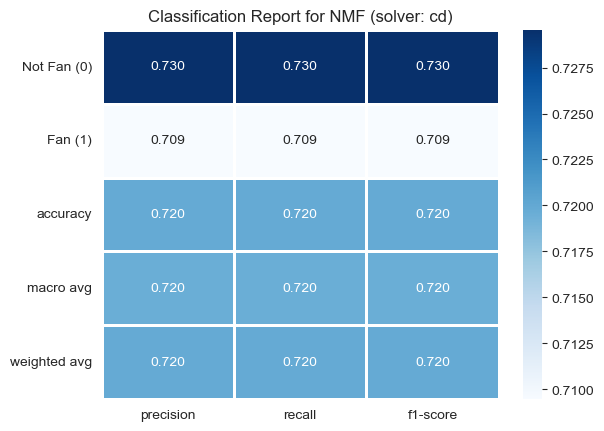

In [1227]:
# Classification Report
labels = [0,1]
names = ["Not Fan (0)", "Fan (1)"]
clf_nmfcd_test = classification_report(y_test, yp_test_nmfcd, labels = labels, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_nmfcd_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.3f')
plt.title("Classification Report for NMF (solver: cd)")
plt.yticks(rotation = 0)
plt.show()

**Summary of Classification Report for NMF with coordinate descent**

Here we see the scores were fairly consistent across categories.  Let's check the Confusion Matrix below.

**Figure 10**

_Confusion Matrix for NMF (solver: cd)_

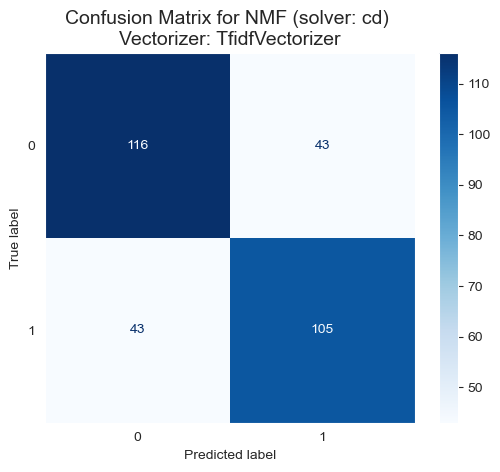

In [1223]:
# Display confusion matrix
cm_nmfcd = confusion_matrix(y_test, yp_test_nmfcd)
cmd_nmfcd = ConfusionMatrixDisplay(cm_nmfcd, display_labels=labels)
cmd_nmfcd.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for NMF (solver: cd) \nVectorizer: TfidfVectorizer', fontsize = 14)
plt.show()

**Summary of Classification Report for NMF (solver: cd) with TfidfVectorizer** 


This accuracy score dropped on the test data. In the Classification Report, we see the same number of mislabeled items for each category. The decline may be due to overfitting on the training data. We definitely want to improve upon that result.  

Let's try NMF with multiplicative update next.

### NMF with Multiplicative Update

Next, we'll use the NMF model with solver set to 'mu' for multiplicative update.  This model will also have the beta_loss set to 'kullback-leibler'.  It is expected to run slower; therefore, we will adjust the number of iterations.

To summarize the parameters explored for NMF with multiplicative update, those include:

* **n_components:** the number of components was again set to 2, since we have 2 categories of articles (this number is typically not known with Unsupervised Learning; however, it is known for this dataset)

* **solver:** 'mu' represents the multiplicative update algorithm used for convergence.

* **beta_loss:** the beta_loss calculation uses the Kullback-Leibler divergence, which measures the dissimilarity between the predictions and actual values.

* **max_iter:** the maximum number of iterations for this model to run.  It is set at 500 to ensure convergence.

* **init:** the initialization method of which we investigate the options: Non-Negative Double Singular Value Decomposition Average (NNDSVDA), and Non-Negative Double Singular Value Decomposition Random (NNDSVDAR).  Typically, NNDSVDA replaces zeros with an average and NNDSVDAR replaces zeros with a random value. Therefore, these initializers may be more suitable when a sparse matrix is not preferred. 

* **alpha_W:** sets a regularization on the W matrix

* **alpha_H:** sets a regularization on the H matrix, 'same' uses the same value as for the W matrix

* **l1_ratio:** addresses the ratio of l1 to l2 penalty in regularization of the data.  The parameter is set between 0 to 1 -- where 0 is a l2 penalty and 1 is a l1 penalty.  A value in between denotes the ratio of the two penalties.

Let's see what the results are from our Randomized Search Cross Validation below.

### NMF with Multiplicative Update using Randomized Search CV

In [1233]:
# Build pipe
pipe_nmf = Pipeline([("vect", TfidfVectorizer()), ("clf", NMF(n_components = 2, solver = 'mu', beta_loss = 'kullback-leibler', max_iter = 500))])
pipe_nmf

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 NMF(beta_loss='kullback-leibler', max_iter=500, n_components=2,
                     solver='mu'))])

In [1234]:
# Parameter grid
param_nmf = {
    "vect__max_df": (0.50, 0.75),
    "vect__min_df": (3,4,5,7),
    "vect__ngram_range": ((1, 1), (1, 2), (1,3)),  
    "vect__norm": ("l1", "l2"), 
    "vect__stop_words": ('english', None),
    "clf__init": ('nndsvda', 'nndsvdar', None),
    "clf__alpha_W": (5e-6, 5e-5, 5e-4, 5e-3),
    "clf__l1_ratio": (0.0, 0.5, 1.0)
}

In [1235]:
# Randomized Search CV
rand_nmf = RandomizedSearchCV(estimator = pipe_nmf, param_distributions = param_nmf,
    n_iter = 200, error_score = 'raise', refit = True, n_jobs = 2, random_state = 42, verbose = 0,cv = 5,scoring = custom_acc_score)

In [1236]:
# fit and check time ... use text data 
t0 = time()
rand_nmf.fit(X_train['text'], y_train)
print(f"Done in {time() - t0:.3f}s")

Done in 37.106s


In [1237]:
# View top results
pd.set_option('display.max_colwidth', 250)
best_nmfmu_params = pd.DataFrame(rand_nmf.cv_results_)
best_nmfmu_params[['params', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False).head(8)

,params,mean_test_score
171,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 1), 'vect__min_df': 5, 'vect__max_df': 0.5, 'clf__l1_ratio': 1.0, 'clf__init': None, 'clf__alpha_W': 5e-05}",0.8156
195,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 2), 'vect__min_df': 3, 'vect__max_df': 0.5, 'clf__l1_ratio': 0.5, 'clf__init': None, 'clf__alpha_W': 5e-06}",0.8128
117,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 2), 'vect__min_df': 7, 'vect__max_df': 0.5, 'clf__l1_ratio': 0.5, 'clf__init': 'nndsvda', 'clf__alpha_W': 5e-06}",0.8128
22,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 3), 'vect__min_df': 3, 'vect__max_df': 0.5, 'clf__l1_ratio': 1.0, 'clf__init': 'nndsvda', 'clf__alpha_W': 5e-06}",0.8128
0,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 3), 'vect__min_df': 7, 'vect__max_df': 0.5, 'clf__l1_ratio': 0.0, 'clf__init': 'nndsvda', 'clf__alpha_W': 0.0005}",0.8114
164,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 2), 'vect__min_df': 4, 'vect__max_df': 0.5, 'clf__l1_ratio': 0.0, 'clf__init': None, 'clf__alpha_W': 0.0005}",0.8114
18,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 2), 'vect__min_df': 4, 'vect__max_df': 0.75, 'clf__l1_ratio': 0.0, 'clf__init': None, 'clf__alpha_W': 5e-05}",0.8114
92,"{'vect__stop_words': None, 'vect__norm': 'l2', 'vect__ngram_range': (1, 2), 'vect__min_df': 7, 'vect__max_df': 0.75, 'clf__l1_ratio': 1.0, 'clf__init': 'nndsvdar', 'clf__alpha_W': 0.0005}",0.8114


**Summary:** These accuracy scores are somewhat better.  Let's see if we can improve on that below.

### NMF Model with Multiplicative Update

Since these scores are close, we can evaluate the top parameters from above in our model below.  Ultimately, we want the model to provide the best accuracy score on our test data.

In [1632]:
#Use Tfidf Vectorizer
tfidf = TfidfVectorizer(max_df = 0.50, min_df = 7, ngram_range = (1,1), norm = 'l2', stop_words = None) 

In [1633]:
# doc matrix
doc_matrix = tfidf.fit_transform(X_train['text'])

In [1634]:
# Choose n_components = 2
nmf_mod = NMF(n_components = 2, init = 'nndsvda', random_state = 42, beta_loss= "kullback-leibler", 
              solver = "mu", alpha_W = 5e-05, alpha_H = 'same',l1_ratio = 0.0)  

In [1635]:
# Fit model
nmf_mod.fit(doc_matrix)

NMF(alpha_W=5e-05, beta_loss='kullback-leibler', init='nndsvda', n_components=2,
    random_state=42, solver='mu')

In [1636]:
#execution time
nmf_time = %timeit -o nmf_mod.fit(doc_matrix)

45.1 ms ± 394 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Let's view the top words extracted from our NMF model and see how these might pertain to the user being a fan or not being a fan of the recipe.

**Figure 11**

_Top Words by Star Ratings with NMF_

Here we can view the top words by category.  This figure helps us understand which words are most frequently captured in each category.  Despite the categories being shown as numbers, we can make educated guesses on which of the five categories these words might represent.

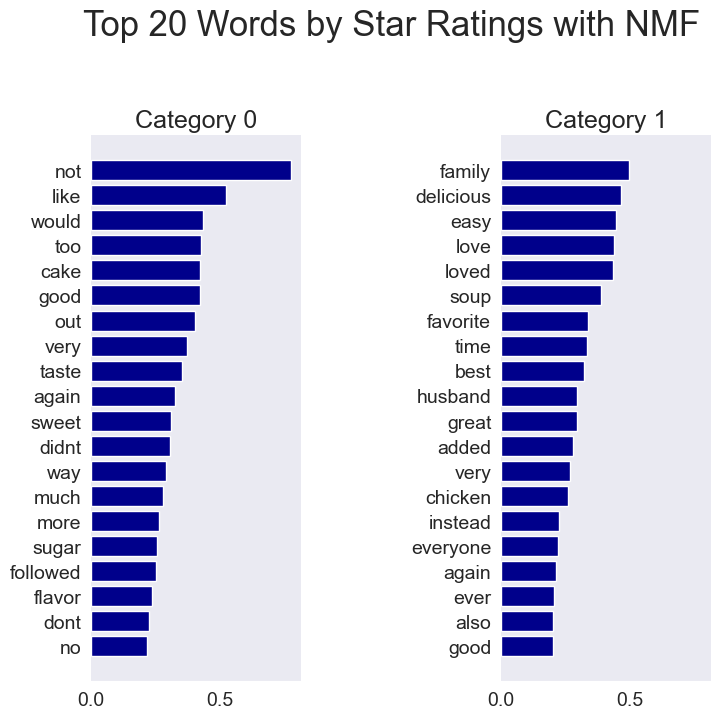

In [1637]:
# Display top words in chart
n_words = 20
feat_names = tfidf.get_feature_names_out()

fig, axes = plt.subplots(1,2, figsize=(8,7), sharex=True)
axes = axes.flatten()
for idx, cat in enumerate(nmf_mod.components_):
    top_feats_idx = cat.argsort()[-n_words:]
    top_feats = feat_names[top_feats_idx]
    wts = cat[top_feats_idx]

    ax = axes[idx]
    ax.barh(top_feats, wts, height = 0.8, color = 'darkblue')
    ax.set_title(f"Category {idx}", fontdict={"fontsize": 18})
    ax.tick_params(axis = "both", which = "major", labelsize=14)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle(f"Top {n_words} Words by Star Ratings with NMF", fontsize=25)

plt.subplots_adjust(top=0.8, bottom=0.02, wspace=0.95, hspace=0.4)
plt.show()

**Summary of Top 20 Words by Category with NMF**

As we can see by the above, we could make educated guesses as to which words apply to each category label.  

For example:
* **Category 0:** not, too, didnt, dont --> _Not Fan_

* **Category 1:** delicious, love, great, good --> _Fan_


We also notice a number of words from our cloud.  Let's check our accuracy scores with this model.

In [1638]:
# Apply labels to the original articles
nmf_results = nmf_mod.transform(doc_matrix)
yp_nmf_train = nmf_results.argmax(axis = 1)

### Check Accuracy of labels in training data

In [1639]:
best_order, best_nmf_train_acc = label_permute_compare(y_train, yp_nmf_train)
print("The best accuracy score for the NMF model on training data was:", best_nmf_train_acc)

The best accuracy score for the NMF model on training data was: 0.821


**Summary:**  This accuracy score is fairly decent for an Unsupervised Learning model. Of course, we would like to improve further.  Let's check the performance on the test data.

### Predictions on Test Data

In [1640]:
# vectorize 
dtm_new = tfidf.fit_transform(X_test['text'])
nmf_test_fit = nmf_mod.fit(dtm_new)

# Apply model to test data
nmf_res_test = nmf_mod.transform(dtm_new)
yp_nmf_test = nmf_res_test.argmax(axis = 1)

### Metrics on Test Data

In [1641]:
# Compute accuracy score
best_test_order, best_nmf_test_acc = label_permute_compare(y_test, yp_nmf_test)
print("The best accuracy score for the NMF model on test data was:", best_nmf_test_acc)

The best accuracy score for the NMF model on test data was: 0.795


**Figure 12**

_Classification Report for NMF (solver: mu)_

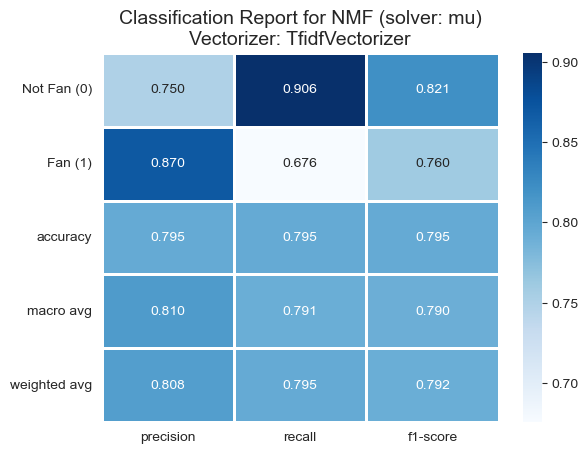

In [1642]:
# Classification Report
labels = [0,1]
names = ["Not Fan (0)", "Fan (1)"]
clf_nmf_test = classification_report(y_test, yp_nmf_test, labels = labels, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_nmf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.3f')
plt.title("Classification Report for NMF (solver: mu)\nVectorizer: TfidfVectorizer", fontsize = 14)
plt.yticks(rotation = 0)
plt.show()

**Summary:** The accuracy score dropped on the test data.  This decline may be due to overfitting on the training data. Although, we see the lowest scores are in precision for "not a fan" and recall for "is fan".  Let's check the Confusion Matrix.

**Figure 13**

_Confusion Matrix for NMF (solver: mu)_

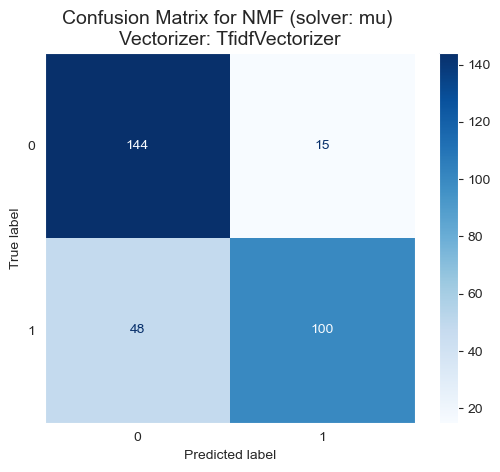

In [1643]:
# Display confusion matrix
cm_nmfmu = confusion_matrix(y_test, yp_nmf_test)
cmd_nmfmu = ConfusionMatrixDisplay(cm_nmfmu, display_labels=labels)
cmd_nmfmu.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for NMF (solver: mu) \nVectorizer: TfidfVectorizer', fontsize = 14)
plt.show()

**Summary of Confusion Matrix for NMF with TfidfVectorizer** 

Here we see where the biggest drop in accuracy occurred:

* The model misclassified over 40 rows of test data as '0' when the true label was '1'.  In other words, it incorrectly classified 48 reviews as "not a fan" when the review actually was "a fan" of the recipe.

Thus, let's try NMF with multiplicative update on the larger data subset below.  

### Predictions on Larger Data Subset

Let's try this model with the larger data subset and see if we can better predict the "fans" category.

In [1662]:
#Use Tfidf Vectorizer
tfidf2 = TfidfVectorizer(max_df = 0.50, min_df = 9, ngram_range = (1,2), norm = 'l2', stop_words = None) 

In [1663]:
# doc matrix
doc_matrix2 = tfidf2.fit_transform(X_train2['text'])

In [1664]:
# Choose n_components = 2
nmf_mod2 = NMF(n_components = 2, init = 'nndsvda', random_state = 42, beta_loss= "kullback-leibler", 
              solver = "mu", alpha_W = 5e-02, alpha_H = 5e-01,l1_ratio = 0.0) 

In [1665]:
# Fit model
nmf_mod2.fit(doc_matrix2)

NMF(alpha_H=0.5, alpha_W=0.05, beta_loss='kullback-leibler', init='nndsvda',
    n_components=2, random_state=42, solver='mu')

Let's view the top words extracted from our NMF model and see how these might pertain to the user being a fan or not being a fan of the recipe.

In [1666]:
# get feature names
n_words = 10
for index, cat in enumerate(nmf_mod2.components_):
    print(f"The top {n_words} words for category number {index}")
    print([tfidf2.get_feature_names_out()[i] for i in cat.argsort()[-n_words:]])

The top 10 words for category number 0
['sweet', 'way', 'taste', 'much', 'would', 'out', 'too', 'cake', 'like', 'not']
The top 10 words for category number 1
['soup', 'chicken', 'added', 'good', 'very', 'loved', 'love', 'delicious', 'family', 'easy']


Again, we see words such as "didnt" and "not" for category 0, which would presumably be "not fan" -- whereas, words such as "best", "loved" and "delicious" for category 1 would presumably be fan. 

### Check Accuracy of labels in training data

In [1667]:
# Apply labels 
nmf_results2 = nmf_mod2.transform(doc_matrix2)
yp_nmf_train2 = nmf_results2.argmax(axis = 1)

# get accuracy
best_order2, best_nmf_train_acc2 = label_permute_compare(y_train2, yp_nmf_train2)
print("The best accuracy score for the NMF model on training data was:", best_nmf_train_acc2)

The best accuracy score for the NMF model on training data was: 0.793


**Note:** This was a decline in performance from before.  Let's see how this performs on the test data.

### Predictions on Test Data

In [1668]:
# vectorize 
dtm_new2 = tfidf2.fit_transform(X_test2['text'])
nmf_test_fit2 = nmf_mod2.fit(dtm_new2)

# Apply model to test data
nmf_res_test2 = nmf_mod2.transform(dtm_new2)
yp_nmf_test2 = nmf_res_test2.argmax(axis = 1)

### Metrics on Test Data¶


In [1669]:
# Compute accuracy score
best_test_order2, best_nmf_test_acc2 = label_permute_compare(y_test2, yp_nmf_test2)
print("The best accuracy score for the NMF model on test data was:", best_nmf_test_acc2)

The best accuracy score for the NMF model on test data was: 0.693


**Figure 14**

_Classification Report for NMF (solver: mu) with Larger Data Subset_

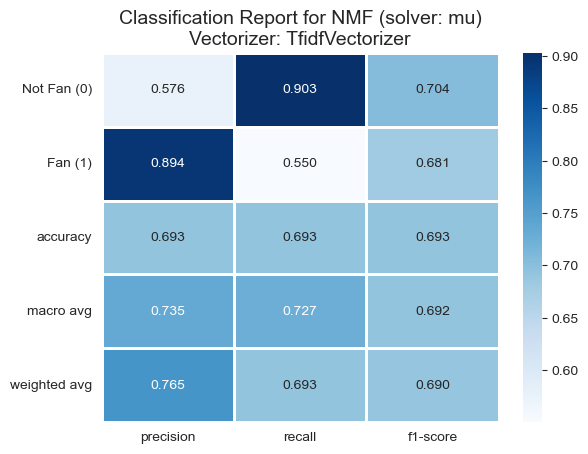

In [1670]:
# Classification Report
labels = [0,1]
names = ["Not Fan (0)", "Fan (1)"]
clf_nmf_test2 = classification_report(y_test2, yp_nmf_test2, labels = labels, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_nmf_test2).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.3f')
plt.title("Classification Report for NMF (solver: mu)\nVectorizer: TfidfVectorizer", fontsize = 14)
plt.yticks(rotation = 0)
plt.show()

**Summary:** Again, the accuracy score dropped quite a bit on the test data.  This decline may be due to overfitting on the training data. Although, we see the lowest scores are in precision for "not a fan" and recall for "is fan".  These values also dropped from the smaller subset.  Let's view the Confusion Matrix.

**Figure 15**

_Confusion Matrix for NMF (solver: mu) on Larger Data Subset_

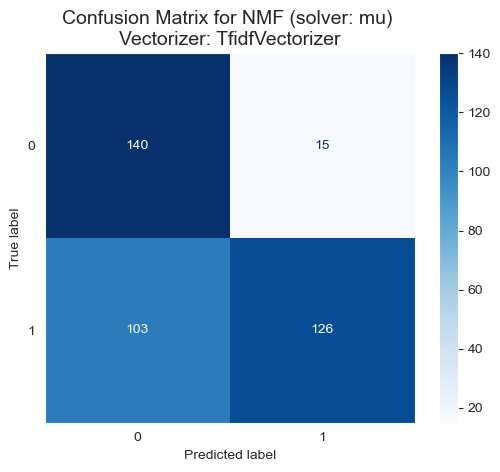

In [1671]:
# Display confusion matrix
cm_nmfmu2 = confusion_matrix(y_test2, yp_nmf_test2)
cmd_nmfmu2 = ConfusionMatrixDisplay(cm_nmfmu2, display_labels=labels)
cmd_nmfmu2.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for NMF (solver: mu) \nVectorizer: TfidfVectorizer', fontsize = 14)
plt.show()

**Summary of Metrics with NMF on Larger Data Subset**

Clearly the results are worse.  This outcome is disappointing.  There may be other approaches to improve these results.  Certainly, when we viewed the comments from the 3-star ratings, there was a mix of positive and negative comments.  In which case, increasing 3-star comments in this larger data subset may have played a role in reducing the performance.  (_Note: Several combinations of parameters were tried on this larger data subset, but none outperformed the previous model_)

Let's try our best NMF model on a small sample of unlabeled data then we'll move onto Supervised Learning models.

### Predictions on Unlabeled Data

Now, let's use a sampling of the zero star reviews to see how well our NMF model above predicts on unlabeled data. 

**Create small sample from zero ratings dataframe**

We will create a small sample of 10 reviews that we can easily view and evaluate our results.

In [1672]:
# Create zeros dataframe with just 'text'
zeros_df = zeros[['text']].sample(10, random_state = 99)
zeros_df.head()

,text
3912,"so easy to adapt to your tastes / groceries on hand. tonight, i swapped the quantites of cheddar and mozzarella, and added a 2.5oz bag of bacon bits to the meat mixture for &#34;bacon cheeseburger pizza.&#34; hubby took one bite and announced, &#..."
6647,"this is absolutely the best chocolate cake of all! i have made this cake many, many times over the years and have yet to find one that could top it! very rich and moist."
10838,"wvallj -i think that applesauce would be an ideal replacement but i have also used &#34;i can&#39;t believe it&#39;s not butter&#34; fat free and have had excellent results. the splenda sugar blends, brown and white, will also help nix some of th..."
15820,i made these for christmas as well and they were delicious. everyone loved them and there were no leftovers! i will definitely make these again!!
13328,this sounds like a super recipe and i&#39;m going to make it for my supper will let you all know how it was


**Clean, stem and lemmatize**

Here we see it needs cleaning, as well as the lemmatization and stemming.  Let's quickly execute those commands.

In [1673]:
# Clean text
zeros_df['text'] = zeros_df['text'].apply(lambda x: re.sub('[^\w\s]', '', x))
# Clean numbers
zeros_df['text'] = zeros_df['text'].apply(lambda x: re.sub('[0-9]', '', x))

In [1674]:
#Apply lemmatization and stemming
zeros_df['clean_text'] = zeros_df['text'].apply(lemma_stem)
zeros_df = zeros_df.reset_index(drop = True)
#zeros_df.head()

**Transform text and get predictions**

In [1675]:
# transform and get predictions
zero_trans = tfidf.transform(zeros_df.clean_text)

# vectorize 
nmf_unl_fit = nmf_mod.fit(zero_trans)

# Apply model to test data
nmf_res_unl = nmf_mod.transform(dtm_new)
yp_nmf_unl = nmf_res_test.argmax(axis = 1)

In [1676]:
# Check predictions compared to the original text
pd.set_option('display.max_colwidth', 500)
zeros_df['is_fan_predict'] = pd.DataFrame(yp_nmf_unl)
predictions = zeros_df[['text', 'is_fan_predict']]
predictions.head(10)

,text,is_fan_predict
0,so easy to adapt to your tastes groceries on hand tonight i swapped the quantites of cheddar and mozzarella and added a oz bag of bacon bits to the meat mixture for bacon cheeseburger pizza hubby took one bite and announced its a keeper i plan to try a version with mexiblend cheese and taco seasoning in the meat maybe salsa or taco sauce instead of tomato sauce,0
1,this is absolutely the best chocolate cake of all i have made this cake many many times over the years and have yet to find one that could top it very rich and moist,0
2,wvallj i think that applesauce would be an ideal replacement but i have also used i cant believe its not butter fat free and have had excellent results the splenda sugar blends brown and white will also help nix some of the calories,0
3,i made these for christmas as well and they were delicious everyone loved them and there were no leftovers i will definitely make these again,1
4,this sounds like a super recipe and im going to make it for my supper will let you all know how it was,1
5,i love cauliflower soup as the weather gets cooler its so comforting and filling i adjusted this recipe to make it a lot lighter in calories and fat and it tastes incredible before boiling the vegetables in stock to make the soup i roasted the cauliflower onions and garlic first it adds a lovely depth of flavor,1
6,a great tasting and easy dish to make the family all loved this one its a keeper recipe,0
7,i believe the temp in this recipe it too high the muffins cooked too long on the bottom and was too soft in the middle the next batch i am turning it down to for minutes,1
8,this is a great and easy recipe i take it to special gathering and always get wonderful raves love it,0
9,this is wonderful i will definitely make it again five stars all the way,1


**Summary of predictions on unlabeled data:** 

**How did we do?  About as good as random prediction** 

Of this sample of 10, approximately half were correct. However, this sample is disproportionately "fans" and the output of our model was 5 reviews each labeled '0' ("not fan") and '1' ("fan").  Thus, it might perform better on balanced sample data. _(Note: The predictions improved slightly by changing the parameters in the original NMF model. However, it was still approximately 6 out of 10.)_

Now, let's evaluate the Supervised Learning models below and see if they perform any better.

# Supervised Learning Models

Since we have the ratings, let's compare the results above to two supervised learning models:

* Multinomial Naive Bayes

* Logistic Regression

We will also see how these models perform with different n-gram ranges.


## Multinomial Naive Bayes with Tfidf Vectorizer

Let's see how Multinomial Naive Bayes performs with TfidfVectorizer.  We use Randomized Search Cross Validation again to narrow the parameters.

### Multinomial Naive Bayes with Tfidf Vectorizer in RandomizedSearchCV

In [1677]:
pipe_tf = Pipeline([("vect", TfidfVectorizer()),("clf", MultinomialNB())])
pipe_tf

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', MultinomialNB())])

In [1678]:
param_grid = {
    "vect__max_df": (0.50, 0.75),
    "vect__min_df": (2,3,4,5,7,9),
    "vect__ngram_range": ((1, 1), (1, 2), (1,3)),  
    "vect__stop_words": ('english', None),
    "clf__alpha": (0.5, 0.75, 1.0, 1.5),
}

In [1679]:
# Randomized Search CV
rand_cv_tf = RandomizedSearchCV(estimator = pipe_tf, param_distributions = param_grid,
    n_iter = 300, error_score = 'raise', refit = True, n_jobs = 2, random_state = 42, cv = 5, verbose = 1)

In [1680]:
# y-train
y_train_rav = np.ravel(y_train)

In [1681]:
# fit and check time ... use text data
t0 = time()
rand_cv_tf.fit(X_train['text'], y_train_rav)
print(f"Done in {time() - t0:.3f}s")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Done in 10.211s


In [1686]:
# View top results
pd.set_option('display.max_colwidth', 300)
best_mnbtf_params = pd.DataFrame(rand_cv_tf.cv_results_)
best_mnbtf_params[['params', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False).head()

,params,mean_test_score
263,"{'vect__stop_words': None, 'vect__ngram_range': (1, 3), 'vect__min_df': 3, 'vect__max_df': 0.75, 'clf__alpha': 1.5}",0.896630
227,"{'vect__stop_words': None, 'vect__ngram_range': (1, 3), 'vect__min_df': 3, 'vect__max_df': 0.5, 'clf__alpha': 1.5}",0.896630
225,"{'vect__stop_words': None, 'vect__ngram_range': (1, 2), 'vect__min_df': 3, 'vect__max_df': 0.5, 'clf__alpha': 1.5}",0.893833
261,"{'vect__stop_words': None, 'vect__ngram_range': (1, 2), 'vect__min_df': 3, 'vect__max_df': 0.75, 'clf__alpha': 1.5}",0.893833
83,"{'vect__stop_words': None, 'vect__ngram_range': (1, 3), 'vect__min_df': 3, 'vect__max_df': 0.5, 'clf__alpha': 0.75}",0.891064


**Note:**  It is interesting to see very close scores with the different combinations of parameters.  Since some of the combinations above yielded identical mean test scores, let's try a couple below.  Our objective would be the model yielding the best results on the test data.  

### Multinomial Naive Bayes with TfidfVectorizer

Here we are plugging some of the top parameter combinations from our Randomized Search Cross Validation above.

In [1687]:
# Use results above 
tf_vect = TfidfVectorizer(max_df = 0.50, min_df = 7, ngram_range = (1,3), stop_words = None)   

In [1688]:
# transform doc
tf_train_doc = tf_vect.fit_transform(X_train['text'])
tf_test_doc = tf_vect.transform(X_test['text'])

In [1689]:
# model
y_train_rav = np.ravel(y_train)
mnb_tf = MultinomialNB(alpha = 1.5)
mnb_tf.fit(tf_train_doc, y_train_rav)

MultinomialNB(alpha=1.5)

In [1690]:
#execution time
mnb_time = %timeit -o mnb_tf.fit(tf_train_doc, y_train_rav)

304 µs ± 2.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [1691]:
# predictions
yp_mnb_tf = mnb_tf.predict(tf_test_doc)

# Check score
acc_mnb = accuracy_score(y_test, yp_mnb_tf)
print(f"Accuracy with Multinomial Naive Bayes:", round(acc_mnb,4))

Accuracy with Multinomial Naive Bayes: 0.8893


**Figure 16**

_Classification Report for Multinomial Naive Bayes with TfidfVectorizer_

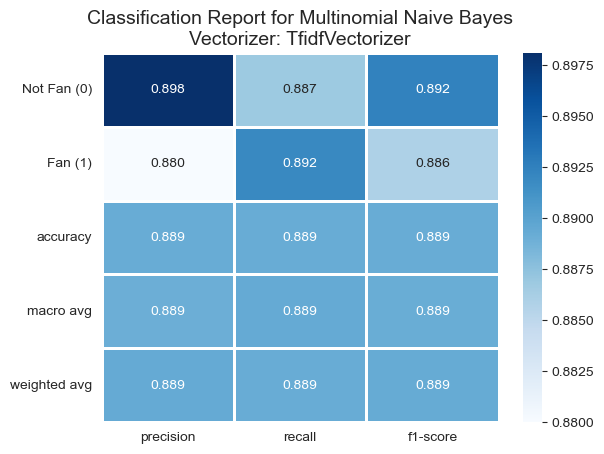

In [1692]:
labels = [0,1]
names = ["Not Fan (0)", "Fan (1)"]
clf_mnbtf_test = classification_report(y_test, yp_mnb_tf, labels = labels, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_mnbtf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.3f')
plt.title("Classification Report for Multinomial Naive Bayes\nVectorizer: TfidfVectorizer", fontsize = 14)
plt.yticks(rotation = 0)
plt.show()

**Summary of Classification Report for Multinomial Naive Bayes with TfidfVectorizer** 

Here we see good scores across both categories. The accuracy score of almost 89% is quite good for Unsupervised Learning.  Meanwhile, the F1-scores for each "not fan" and "fan" categories display less than 1% difference. 

**Figure 17**

_Confusion Matrix for Multinomial Naive Bayes_

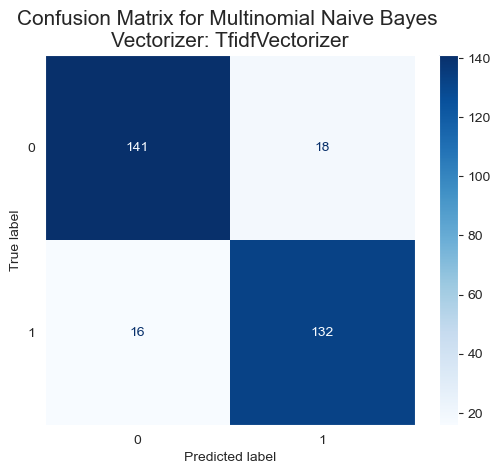

In [1693]:
# Display confusion matrix
cm_mnb = confusion_matrix(y_test, yp_mnb_tf)
cmd_mnb = ConfusionMatrixDisplay(cm_mnb, display_labels=labels)
cmd_mnb.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Multinomial Naive Bayes \nVectorizer: TfidfVectorizer', fontsize = 15)
plt.show()

**Summary of Confusion Matrix for Multinomial Naive Bayes with TfidfVectorizer** 

Here we see that similar numbers of our predicted labels were incorrect for either "0" (not fan) or "1" (fan).  Thus, it performed similarly for each category.

Both the Classification report and Confusion Matrix display fairly balanced output from the Multinomial Naive Bayes model.  It predicted rather well the "not fan" and "fan" categories.  

Next, let's explore Logistic Regression.

## Logistic Regression

Next, we will evaluate Logistic Regression on the recipe reviews.  Since the column "is_fan" is binary, Logistic Regression is a logical choice.

Here we will evaluate Logistic Regression with each of the vectorizers displayed previously:

* Logistic Regression with Word2Vec

* Logistic Regression with CountVectorizer

* Logistic Regression with TfidfVectorizer

Let's start with Logistic Regression with Word2Vec.  For expediency, we will run a straightforward evaluation below.

### Logistic Regression with Word2Vec

To start, we need our Word2Vec model utilizing our sentences information above.  Then, we need to apply this model to our train and test dataset, as we did in the other models.  Finally, we can get our prediction and evaluate the results.  

Below we used the same parameters:

* **vector_size:** the number of values in the word vector output by the model.  Typically, the value utilized ranges from 100 to 1000.

* **window:** sets the number of words in the training window, which is a sliding window

* **min_count:** set to 3 to capture all words that occur at least 3 times

* **workers:** use 1 thread to train the model for reproducibility (where a higher number will execute faster)

In [1704]:
#Use our Word2Vec model from above: 
vector_size = 100
w2v_model = Word2Vec(sentences, vector_size = vector_size, window = 5, min_count = 3, workers = 1)

# Vectorize train and test data
def word_vec(sent):
    word_list = sent.split()
    word_vectors = [w2v_model.wv[w] for w in word_list if w in w2v_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(vector_size)
    return np.array(word_vectors).mean(axis = 0)

#apply to train and test text
X_train_w2v = np.array([word_vec(sent) for sent in X_train.text])
X_test_w2v = np.array([word_vec(sent) for sent in X_test.text])

In [1705]:
# Logistic Regression on W2V
log_wv = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.0, tol = 0.01, solver = 'saga', random_state = 101)
log_wv.fit(X_train_w2v, y_train)

LogisticRegression(l1_ratio=0.0, penalty='elasticnet', random_state=101,
                   solver='saga', tol=0.01)

In [1706]:
#execution time
logwv_time = %timeit -o log_wv.fit(X_train_w2v, y_train)

8.21 ms ± 77.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1707]:
# Check score on test data
yp_logwv = log_wv.predict(X_test_w2v)
acc_logwv = accuracy_score(y_test, yp_logwv)
print(f"Accuracy with Logistic Regression:", round(acc_logwv,4))

Accuracy with Logistic Regression: 0.8534


**Figure 18**

_Classification Report for Logistic Regression with Word2Vec Vectorizer_

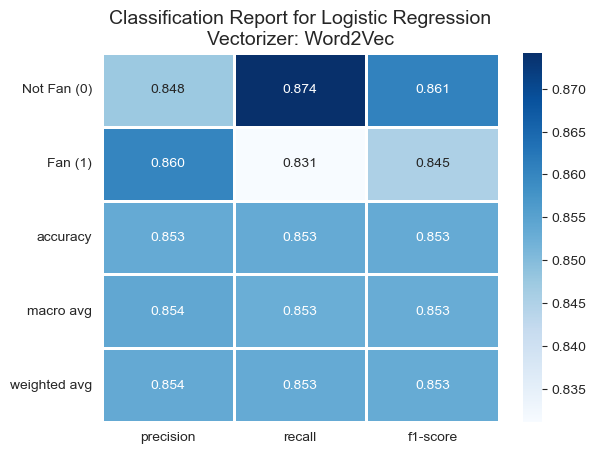

In [1708]:
# Classification Report
labels = [0,1]
names = ["Not Fan (0)", "Fan (1)"]
clf_logwv_test = classification_report(y_test, yp_logwv, labels = labels, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_logwv_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.3f')
plt.title("Classification Report for Logistic Regression\nVectorizer: Word2Vec", fontsize = 14)
plt.yticks(rotation = 0)
plt.show()

**Summary of Classification Report for Logistic Regression with Word2Vec Vectorizer**

Here we see that Logistic Regression with Word2Vec performed better than the matrix factorization methods with TfidfVectorizer.  Although, it was not quite as good as Multinomial Naive Bayes.  Let's view the Confusion Matrix.

**Figure 19**

_Confusion Matrix for Logistic Regression with Word2Vec Vectorizer_

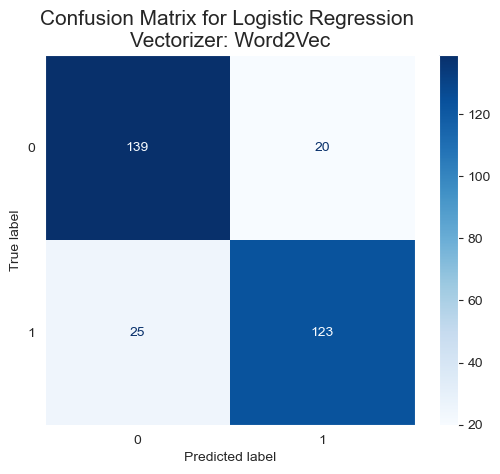

In [1709]:
# Display confusion matrix
cm_logwv = confusion_matrix(y_test, yp_logwv)
cmd_logwv = ConfusionMatrixDisplay(cm_logwv, display_labels=labels)
cmd_logwv.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Logistic Regression \nVectorizer: Word2Vec', fontsize = 15)
plt.show()

**Summary of Confusion Matrix for Logistic Regression with Word2Vec Vectorizer**

In the Confusion Matrix, we see a higher number of positive reviews that were misidentified as negative.

Next, let's see how Count Vectorizer performs with Logistic Regression.

### Logistic Regression with Count Vectorizer in RandomizedSearchCV

To start, we will build a pipeline with Logistic Regression and Count Vectorizer using Randomized Search Cross Validation to help narrow the combinations of parameters yielding the best accuracy score.

**CountVectorizer parameters**

* **max_df:** maximum document frequency of 0.50 and 0.75 which can help eliminate common words found in all documents

* **min_df:**  minimum document frequency using several integers to alleviate outliers

* **ngram_range:** the number of adjacent words to be considered where (1,1) considers just one word, (1,2) includes two word combinations, etc.

* **stop_words:** the vectorizer could remove typical english stop words or none.  The cross validation will try both options.  This setting may not be necessary, since we created our own custom stop words list previously.

**Logistic Regression parameters**

* **tol:** the tolerance indicating the threshold at which to stop the iterations

* **l1_ratio:** addresses the ratio of l1 to l2 penalty in regularization of the data.  The parameter is set between 0 to 1 -- where 0 is a l2 penalty and 1 is a l1 penalty.  A value in between denotes the ratio of the two penalties.

We will explore more variations of parameters in other models below.

In [78]:
pipe_log = Pipeline([("vect", CountVectorizer(analyzer = 'word')),("clf", LogisticRegression(solver = 'saga', penalty = 'elasticnet', max_iter = 4000))])
pipe_log

Pipeline(steps=[('vect', CountVectorizer()),
                ('clf',
                 LogisticRegression(max_iter=4000, penalty='elasticnet',
                                    solver='saga'))])

In [79]:
param_grid = {
    "vect__max_df": (0.50, 0.75),
    "vect__min_df": (2,3,4,5,7),
    "vect__ngram_range": ((1, 1), (1, 2), (1,3), (1,4)),  
    "vect__stop_words": ('english', None),
    "clf__tol": (0.01, 0.001),
    "clf__l1_ratio": (0, 0.5, 1.0)
}

In [80]:
# Randomized Search CV
rand_log = RandomizedSearchCV(estimator = pipe_log, param_distributions = param_grid,
    n_iter = 200, error_score = 'raise', refit = True, n_jobs = 2, random_state = 42, cv = 5, verbose = 1)

In [81]:
# y-train
y_train_rav = np.ravel(y_train)

In [82]:
# fit and check time ... use text data
t0 = time()
rand_log.fit(X_train['text'], y_train_rav)
print(f"Done in {time() - t0:.3f}s")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Done in 31.782s


In [87]:
# View top results
pd.set_option('display.max_colwidth', 300)
best_log_params = pd.DataFrame(rand_log.cv_results_)
best_log_params[['params', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False).head()

,params,mean_test_score
120,"{'vect__stop_words': None, 'vect__ngram_range': (1, 1), 'vect__min_df': 4, 'vect__max_df': 0.5, 'clf__tol': 0.01, 'clf__l1_ratio': 0}",0.864481
115,"{'vect__stop_words': None, 'vect__ngram_range': (1, 1), 'vect__min_df': 4, 'vect__max_df': 0.75, 'clf__tol': 0.01, 'clf__l1_ratio': 0}",0.863092
10,"{'vect__stop_words': None, 'vect__ngram_range': (1, 1), 'vect__min_df': 3, 'vect__max_df': 0.5, 'clf__tol': 0.01, 'clf__l1_ratio': 0}",0.863073
49,"{'vect__stop_words': None, 'vect__ngram_range': (1, 4), 'vect__min_df': 4, 'vect__max_df': 0.75, 'clf__tol': 0.01, 'clf__l1_ratio': 0}",0.863073
84,"{'vect__stop_words': None, 'vect__ngram_range': (1, 2), 'vect__min_df': 4, 'vect__max_df': 0.5, 'clf__tol': 0.01, 'clf__l1_ratio': 0}",0.863073


**Note:**  It is interesting to see very close scores with the different combinations of parameters.  Since some of the combinations above yielded identical mean test scores, let's try a couple below.  Our objective would be the model yielding the best results on the test data.  

### Logistic Regression with Count Vectorizer

Here we will use the parameters from above.

In [88]:
# Use results above
cv_vect2 = CountVectorizer(analyzer = 'word', max_df = 0.50, min_df = 3, ngram_range = (1,4), stop_words = None) 

In [89]:
# transform 
cv_train2 = cv_vect2.fit_transform(X_train['text'])
cv_test2 = cv_vect2.transform(X_test['text'])

In [90]:
logr = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0, tol = 0.01, solver = 'saga', random_state = 101)
logr.fit(cv_train2, y_train)

LogisticRegression(l1_ratio=0, penalty='elasticnet', random_state=101,
                   solver='saga', tol=0.01)

In [91]:
#execution time
logcv_time = %timeit -o logr.fit(cv_train2, y_train)

3.57 ms ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [92]:
# Check score on test data
yp_logcv = logr.predict(cv_test2)
acc_logcv = accuracy_score(y_test, yp_logcv)
print(f"Accuracy with Logistic Regression:", round(acc_logcv,4))

Accuracy with Logistic Regression: 0.8925


**Figure 20**

_Classification Report for Logistic Regression with CountVectorizer_

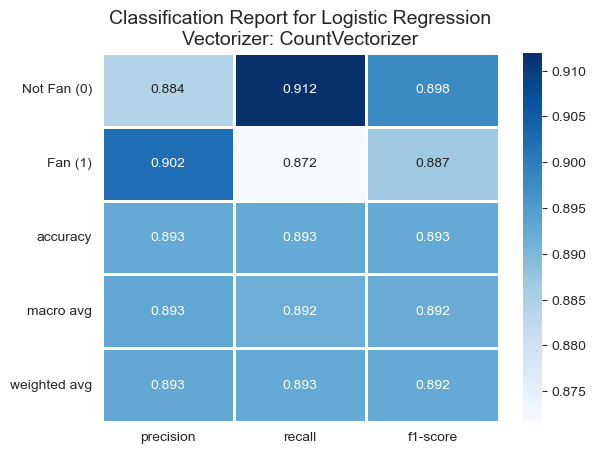

In [93]:
# Classification Report
labels = [0,1]
names = ["Not Fan (0)", "Fan (1)"]
clf_log_test = classification_report(y_test, yp_logcv, labels = labels, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_log_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.3f')
plt.title("Classification Report for Logistic Regression\nVectorizer: CountVectorizer", fontsize = 14)
plt.yticks(rotation = 0)
plt.show()

**Summary of Classification Report for Logistic Regression with CountVectorizer**

This model outperformed Multinomial Naive Bayes with TfidfVectorizer.  

(_Comment: Multinomial Naive Bayes with CountVectorizer was evaluated but the results were identical to the Multinomial Naive Bayes with TfidfVectorizer; therefore, only one example was displayed above._)

Let's evaluate the confusion matrix.

**Figure 21**

_Confusion Matrix for Logistic Regression with CountVectorizer_

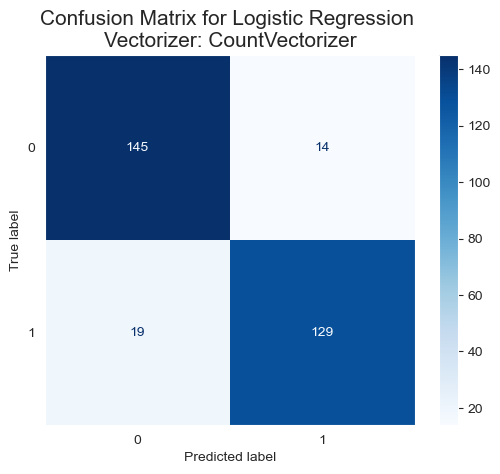

In [94]:
# Display confusion matrix
cm_logcv = confusion_matrix(y_test, yp_logcv)
cmd_logcv = ConfusionMatrixDisplay(cm_logcv, display_labels=labels)
cmd_logcv.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Logistic Regression \nVectorizer: CountVectorizer', fontsize = 15)
plt.show()

**Summary of Confusion Matrix with CountVectorizer**

While this model performed fairly consistent across the two categories, we would like to improve our results. Let's check our last model below, Logistic Regression with TfidfVectorizer.

### Logistic Regression with TfidfVectorizer in RandomizedSearchCV

Again, we will utilize the pipeline and randomized search to expedite our selection of parameters.

In [95]:
pipe_log_tf = Pipeline([("vect", TfidfVectorizer()),("clf", LogisticRegression(solver = 'saga', penalty = 'elasticnet', max_iter = 4000))])
pipe_log_tf

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 LogisticRegression(max_iter=4000, penalty='elasticnet',
                                    solver='saga'))])

In [96]:
param_grid_lt = {
    "vect__max_df": (0.50, 0.75),
    "vect__min_df": (3,4,5),
    "vect__ngram_range": ((1, 1), (1, 2), (1,3)),  
    "vect__stop_words": ('english', None),
    "clf__tol": (0.01, 0.001),
    "clf__l1_ratio": (0, 0.5, 1.0)
}

In [97]:
# Randomized Search CV
rand_log_tf = RandomizedSearchCV(estimator = pipe_log_tf, param_distributions = param_grid_lt,
    n_iter = 200, error_score = 'raise', refit = True, n_jobs = 2, random_state = 42, cv = 5, verbose = 1)

In [98]:
# y-train
y_train_rav = np.ravel(y_train)

In [99]:
# fit and check time ... use text data
t0 = time()
rand_log_tf.fit(X_train['text'], y_train_rav)
print(f"Done in {time() - t0:.3f}s")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Done in 9.010s


In [1721]:
# View top results
pd.set_option('display.max_colwidth', 250)
best_logtf_params = pd.DataFrame(rand_log_tf.cv_results_)
best_logtf_params[['params', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False).head()

,params,mean_test_score
55,"{'vect__stop_words': None, 'vect__ngram_range': (1, 3), 'vect__min_df': 4, 'vect__max_df': 0.75, 'clf__tol': 0.01, 'clf__l1_ratio': 0}",0.886820
141,"{'vect__stop_words': None, 'vect__ngram_range': (1, 3), 'vect__min_df': 4, 'vect__max_df': 0.5, 'clf__tol': 0.001, 'clf__l1_ratio': 0}",0.885422
13,"{'vect__stop_words': None, 'vect__ngram_range': (1, 2), 'vect__min_df': 4, 'vect__max_df': 0.5, 'clf__tol': 0.01, 'clf__l1_ratio': 0}",0.885422
67,"{'vect__stop_words': None, 'vect__ngram_range': (1, 3), 'vect__min_df': 4, 'vect__max_df': 0.75, 'clf__tol': 0.001, 'clf__l1_ratio': 0}",0.885422
28,"{'vect__stop_words': None, 'vect__ngram_range': (1, 2), 'vect__min_df': 4, 'vect__max_df': 0.5, 'clf__tol': 0.001, 'clf__l1_ratio': 0}",0.885422


**Note:**  It is interesting to see very close scores with the different combinations of parameters.  Since some of the combinations above yielded identical mean test scores, let's try a couple below.  Our objective would be the model yielding the best results on the test data.  

### Logistic Regression with Tfidf Vectorizer

Again, we will use the parameters identified above.

In [101]:
# Use results above
tf_vect2 = TfidfVectorizer(max_df = 0.50, min_df = 5, ngram_range = (1,2), stop_words = None) 

In [102]:
# transform doc
tf_train2 = tf_vect2.fit_transform(X_train['text'])
tf_test2 = tf_vect2.transform(X_test['text'])

In [103]:
log_tf = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.0, tol = 0.01, solver = 'saga', random_state = 101)
log_tf.fit(tf_train2, y_train)

LogisticRegression(l1_ratio=0.0, penalty='elasticnet', random_state=101,
                   solver='saga', tol=0.01)

In [104]:
#execution time
logtf_time = %timeit -o log_tf.fit(tf_train2, y_train)

1.32 ms ± 2.13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [105]:
# Check score on test data
yp_log_tf = log_tf.predict(tf_test2)
acc_log_tf = accuracy_score(y_test, yp_log_tf)
print(f"Accuracy with Logistic Regression:", round(acc_log_tf,4))

Accuracy with Logistic Regression: 0.9023


**Figure 22**

_Classification Report for Logistic Regression with TfidfVectorizer_

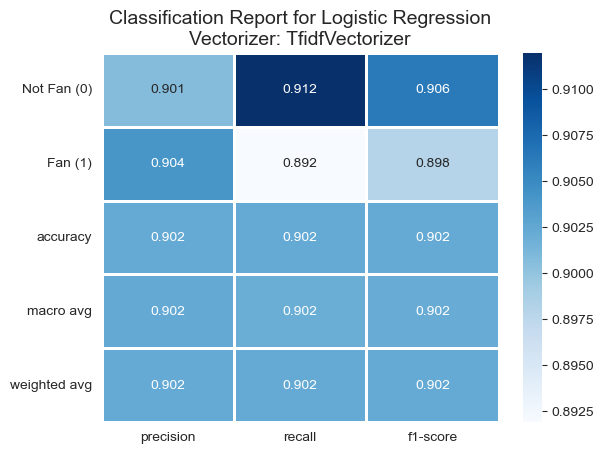

In [106]:
# Classification Report
labels = [0,1]
names = ["Not Fan (0)", "Fan (1)"]
clf_logtf_test = classification_report(y_test, yp_log_tf, labels = labels, target_names = names, output_dict = True)

# Heatmap view
sns.heatmap(pd.DataFrame(clf_logtf_test).iloc[:-1, :].T, annot = True, cmap = "Blues", linewidth = 1, fmt = '.3f')
plt.title("Classification Report for Logistic Regression\nVectorizer: TfidfVectorizer", fontsize = 14)
plt.yticks(rotation = 0)
plt.show()

**Summary of Classification Report for Logistic Regression with TfidfVectorizer**

Here we see our best results all together.  Let's view the Confusion Matrix below.

**Figure 23**

_Confusion Matrix for Logistic Regression with TfidfVectorizer_

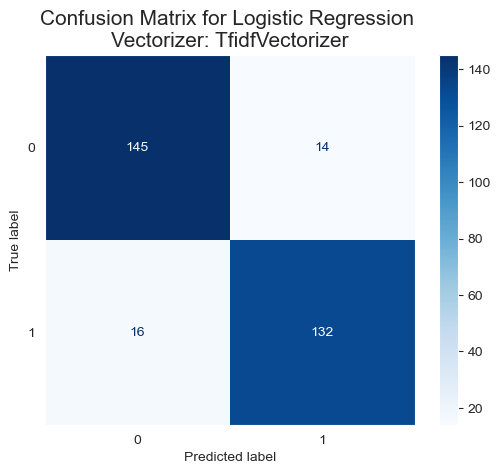

In [107]:
# Display confusion matrix
cm_logtf = confusion_matrix(y_test, yp_log_tf)
cmd_logtf = ConfusionMatrixDisplay(cm_logtf, display_labels=labels)
cmd_logtf.plot(cmap = plt.cm.Blues) 
plt.title('Confusion Matrix for Logistic Regression \nVectorizer: TfidfVectorizer', fontsize = 15)
plt.show()

**Summary of Confusion Matrix for Logistic Regression: TfidfVectorizer**

Here we see our best results yet.  We have the fewest misclassifications with this model and vectorizer combination.

Let's try this model on the sample of unlabeled data from before and see if it yields better results.

### Predictions on Unlabeled Data

Now, let's use the sampling of zero star reviews from above to see how well this model predicts on unlabeled data. We will utilize the same small sample of 10 reviews from above, so we can easily view and evaluate our results.

**Transform text and get predictions**

In [1710]:
# transform and get predictions
zero_trans = tf_vect2.transform(zeros_df.clean_text)
ypz = log_tf.predict(zero_trans)

In [1711]:
# Check predictions compared to the original text
pd.set_option('display.max_colwidth', 500)
zeros_df['is_fan_predict'] = pd.DataFrame(ypz)
predictions = zeros_df[['text', 'is_fan_predict']]
predictions.head(10)

,text,is_fan_predict
0,so easy to adapt to your tastes groceries on hand tonight i swapped the quantites of cheddar and mozzarella and added a oz bag of bacon bits to the meat mixture for bacon cheeseburger pizza hubby took one bite and announced its a keeper i plan to try a version with mexiblend cheese and taco seasoning in the meat maybe salsa or taco sauce instead of tomato sauce,1
1,this is absolutely the best chocolate cake of all i have made this cake many many times over the years and have yet to find one that could top it very rich and moist,1
2,wvallj i think that applesauce would be an ideal replacement but i have also used i cant believe its not butter fat free and have had excellent results the splenda sugar blends brown and white will also help nix some of the calories,0
3,i made these for christmas as well and they were delicious everyone loved them and there were no leftovers i will definitely make these again,1
4,this sounds like a super recipe and im going to make it for my supper will let you all know how it was,0
5,i love cauliflower soup as the weather gets cooler its so comforting and filling i adjusted this recipe to make it a lot lighter in calories and fat and it tastes incredible before boiling the vegetables in stock to make the soup i roasted the cauliflower onions and garlic first it adds a lovely depth of flavor,1
6,a great tasting and easy dish to make the family all loved this one its a keeper recipe,1
7,i believe the temp in this recipe it too high the muffins cooked too long on the bottom and was too soft in the middle the next batch i am turning it down to for minutes,0
8,this is a great and easy recipe i take it to special gathering and always get wonderful raves love it,1
9,this is wonderful i will definitely make it again five stars all the way,1


### Summary of predictions on unlabeled data:  

**How did we do?  It appears the model yielded 8 out 10 correct on this small sample** 

Of this sample of 10, it appears the model correctly labeled 8 reviews. The indices 2 and 4 were flagged incorrectly. Although, this sample of zero ratings is disproportionately "fans", the model did reasonably well.

Let's view a summary of the results and wrap up.

# Analyzing Results: Unsupervised and Supervised Learning Models

Below is a comparison of the accuracy scores and execution times for the Supervised and Unsupervised Learning models.  There is also a summary of the performance and parameters for each of the models.

## Accuracy Scores across all Models

**Figure 24**

_Accuracy Scores across all Models_

In [1712]:
# Extract the accuracy scores for each model
nmf_acc = best_nmf_test_acc
nmf_cd_acc = best_nmfcd_test_acc
km_acc =  acc_km_test
agg_acc = acc_agc_test
#acc_mnb, logcv, log_tf, logwv

# create lists of scores and models
acc_scores = [km_acc, agg_acc, nmf_acc, nmf_cd_acc, acc_mnb, acc_logwv, acc_logcv, acc_log_tf]
model_names = ["K-Means", "Agglomerative Clustering", "NMF (solver: mu)", "NMF (solver: cd)", "Multinomial NB (Tfidf)", "Logistic Regression (W2V)", "Logistic Regression (Count)", "Logistic Regression (Tfidf)"]

<Figure size 640x480 with 0 Axes>

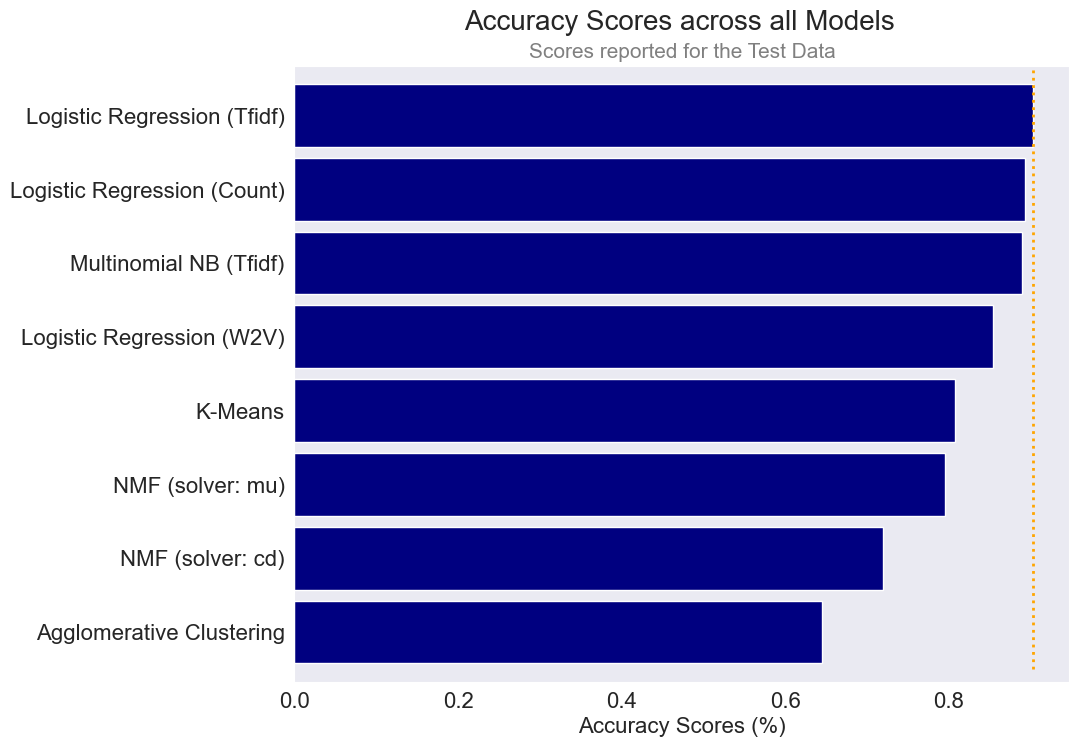

In [1713]:
# Create plot of Accuracy and model names
plt.figure()
plt.figure(figsize = (10,8))
plt.suptitle("Accuracy Scores across all Models", fontsize = 20, x = 0.51, y = 0.95)
plt.title("Scores reported for the Test Data", fontsize = 15, color = "grey")

acc_plot = pd.Series(acc_scores, 
                    index = model_names).sort_values(ascending = True)
ax = acc_plot.plot.barh(width = 0.85, color = 'navy')
plt.vlines(x = 0.9023, ymin = -0.5, ymax = 100, color = "orange", ls = 'dotted', lw = 2)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Accuracy Scores (%)", fontsize = 16)
plt.show()

**Summary of Figure 9: Accuracy Scores across all Models**

Here we see Logistic Regression with TfidfVectorizer yielded the highest Accuracy score on the test data.

Interestingly enough, K-means was in the middle and performed best of the Unsupervised Learning models, slightly better than Non-negative Matrix Factorization with the multiplicative update solver ('mu').

Let's look at the execution times below.

## Execution Times across all Models

**Figure 25**

_Execution Times across all Models_

In [1714]:
# create lists of times and models
model_times = [km_time, agc_time, nmf_time.average, nmf_cd_time.average, mnb_time.average, 
               logwv_time.average, logcv_time.average,logtf_time.average]

model_names = ["K-Means", "Agglomerative Clustering", "NMF (solver: mu)", "NMF (solver: cd)", "Multinomial NB (Tfidf)", "Logistic Regression (W2V)", "Logistic Regression (Count)", "Logistic Regression (Tfidf)"]

<Figure size 640x480 with 0 Axes>

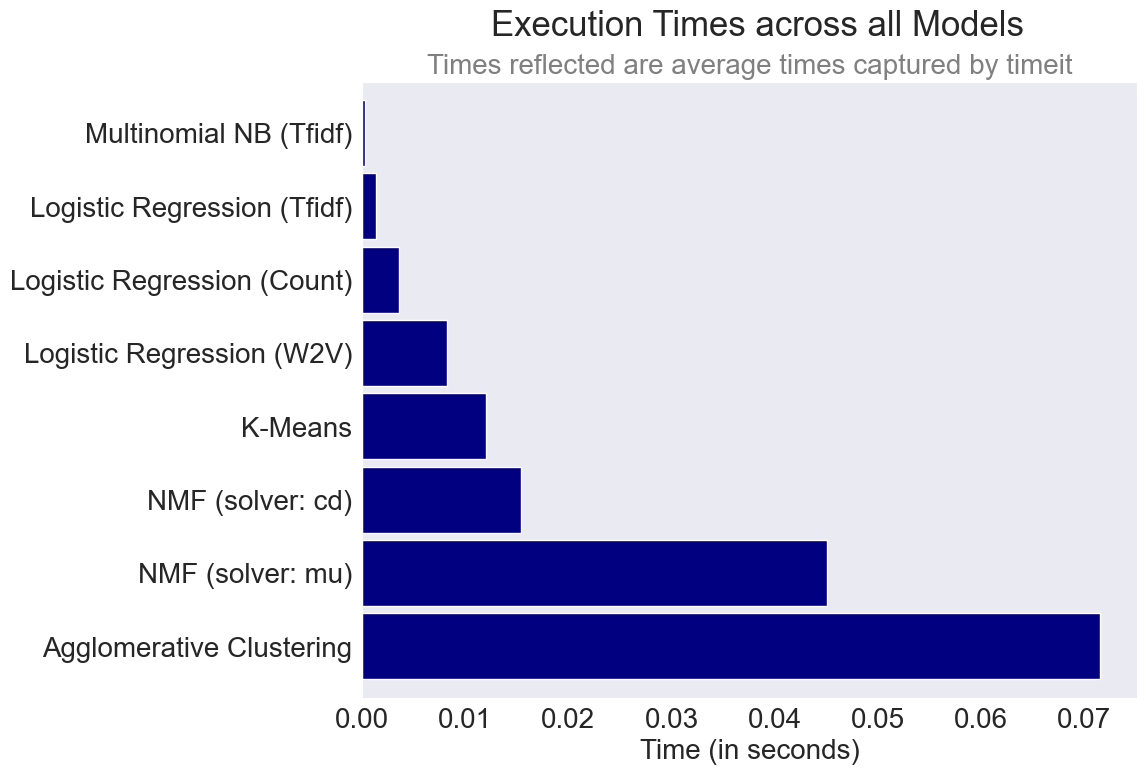

In [1715]:
# Create plot of execution times and model names
plt.figure()
plt.figure(figsize = (10,8))
plt.suptitle("Execution Times across all Models", fontsize = 25, x = 0.52, y = 0.97)
plt.title("Times reflected are average times captured by timeit", fontsize = 20, color = "grey")

time_plot = pd.Series(model_times, 
                    index = model_names).sort_values(ascending = False)
ax = time_plot.plot.barh(width = 0.90, color = 'navy')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Time (in seconds)", fontsize = 20)
plt.show()

**Summary of Figure 10: Execution Times across all Models**

Here we see Multinomial Naive Bayes with TfidfVectorizer executed the fastest, whereas Agglomerative Clustering executed the slowest. Meanwhile, Logistic Regression executed rather fast as well. 

We're almost done.  Let's look at a summary of the false negatives, given the differences we saw in the Confusion Matrix for each model.

## False Negatives

One item of concern was the number of False Negatives in our models.  In those instances, the model incorrectly predicted the review was not a fan.  This Type II error was notable because certain models had higher errors predicting the fans, as we saw in the confusion matrices.  Therefore, let's compare the number of False Negatives across the models to see which model did a better job predicting fans.

**Figure 26**

_False Negatives across Models_

In [1718]:
# create lists of false negatives and models
false_negs = [cm_nmfcd[1,0], cm_nmfmu[1,0], cm_mnb[1,0], cm_logwv[1,0], cm_logcv[1,0], cm_logtf[1,0]]
model_names_fn = ["NMF (solver: cd)", "NMF (solver: mu)", "Multinomial NB (Tfidf)", "Logistic Regression (W2V)", "Logistic Regression (Count)", "Logistic Regression (Tfidf)"]

<Figure size 640x480 with 0 Axes>

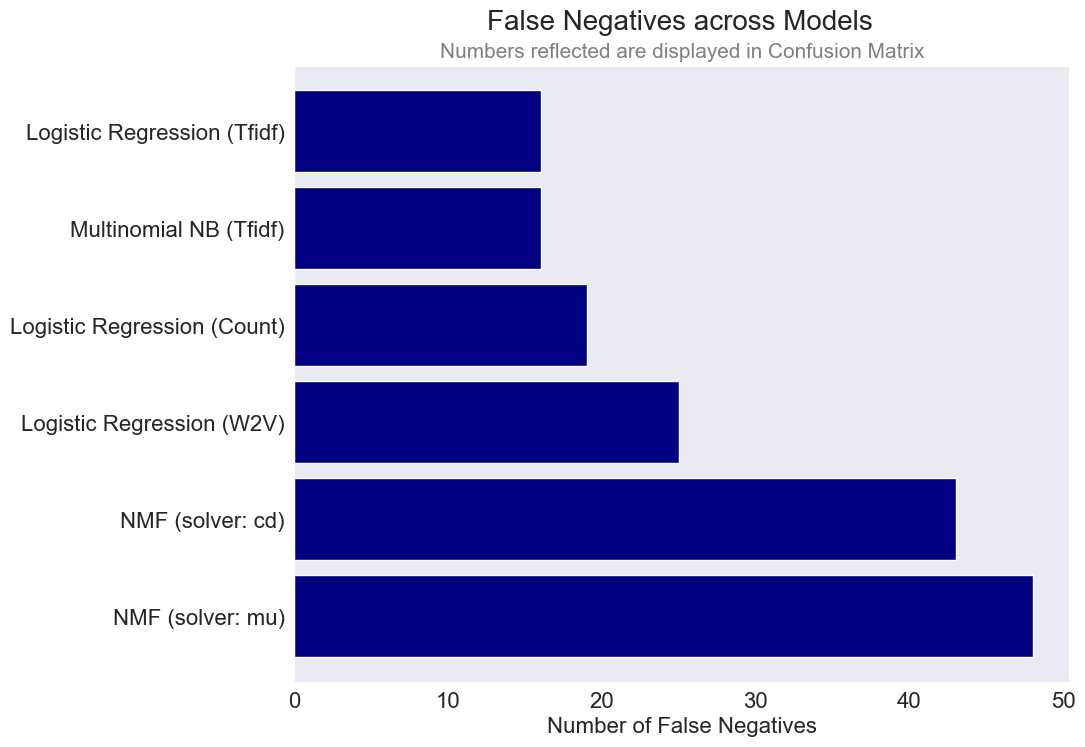

In [1719]:
# Create plot of False Negatives and model names
plt.figure()
plt.figure(figsize = (10,8))
plt.suptitle("False Negatives across Models", fontsize = 20, x = 0.51, y = 0.95)
plt.title("Numbers reflected are displayed in Confusion Matrix", fontsize = 15, color = "grey")

fn_plot = pd.Series(false_negs, 
                    index = model_names_fn).sort_values(ascending = False)
ax = fn_plot.plot.barh(width = 0.85, color = 'navy')

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Number of False Negatives", fontsize = 16)
plt.show()

**Summary of Figure 25: False Negatives across Models**:

In the visualization above, it is easy to see our three models yielding the fewest number of False Negatives were:

* Logistic Regression with TfidfVectorizer
* Multinomial Naive Bayes with TfidfVectorizer
* Logistic Regression with CountVectorizer

Interestingly enough, NMF with coordinate descent solver did a better job predicting fans than NMF with multiplicative update solver.  In our case, we are utilizing Accuracy as our primary metric.  However, if a company wanted to find "fans" then the number of false negatives may alter their model selection.

Next, let's view the summary of performance and parameters across models.

## Performance and Parameters across all Models

**Table 4**

_Summary of Results and Parameters for all Models on Test Data_

|Model  |	Accuracy %| Vectorizer|  Vectorizer Parameters |           
|:-----------|:------------:|:----------------------:|:-----------|
|**K-Means**|$\color{blue}{ 80.8}$ |Tfidf | max_df = 0.75, min_df = 6, ngram_range = (1,2) | 
|**Agglomerative Clustering**| 64.5 |Tfidf | max_df = 0.75, min_df = 6, ngram_range = (1,2) | 
|**NMF (solver: cd)** | 72.0 |Tfidf | max_df = 0.50, min_df = 3, ngram_range = (1,2) | 
|**NMF (solver: mu)**| 79.5 | Tfidf | max_df = 0.50, min_df = 7, ngram_range = (1,1) | 
|**Multinomial Naive Bayes**| 88.9| Tfidf |max_df = 0.50, min_df = 7, ngram_range = (1,3)| 
|**Logistic Regression** | 85.3 |Word2Vec | min_count = 3, window = 5 | 
|**Logistic Regression** | 89.3 |Count | max_df = 0.50, min_df = 3, ngram_range = (1,4)| 
|**Logistic Regression**| $\color{blue}{ 90.2}$ | Tfidf |max_df = 0.50, min_df = 5, ngram_range = (1,2) | 


_Note: All models using TfidfVectorizer and CountVectorizer performed best with 'l2' norm and stop_words = None_

**Summary of Results and Parameters on Test Data:**

A brief synopsis of the tables and lessons learned:

* Selection of the vectorizer and parameters impacted the results.  These parameters impacted the accuracy score and to some degree the execution time of the model.

* By way of example, a higher maximum data frequency and lower minimum document frequency caused slower execution times.

* Selection of the model parameters also impacted the results.  In particular, the choice of solver in the NMF model had an impact on the accuracy and execution time.

* The Supervised Learning models ran significantly faster.  However, the Unsupervised Learning models still executed in fractions of a second.  Thus, the execution time was less of an issue on this particular dataset.

Lastly, the summary and conclusions are below.

# Summary and Conclusion

## Recap of objectives

Below are some of the questions we wanted to address.  Let's recap what we discovered:

**Which method was most successful?**  

Logistic Regression with TfidfVectorizer yielded the highest Accuracy score with the fastest execution time on the test data.

**How do our Unsupervised Learning and Supervised Learning models compare?**

The Unsupervised Learning models yielded decent results.  However, the Supervised Learning models provided better Accuracy and faster execution times.


**How do our feature extraction methods and parameters impact our results?**

The feature extraction methods and parameters impacted both the accuracy scores, as well as the execution times of our models.  Thus, these are important items to consider for any future modeling and predictions.

**Can we improve our model's performance?**

Yes, we were able to improve our performance by: creating a custom stop words list, lemmatizing the text, choice of vectorizer, choice of model, as well as the parameter selection for each. Use of RandomizedSearchCV for cross validation also helped identify parameters which yielded better accuracy scores for our model and vectorizer.

**Which models attain similar results with a subset of the data?**

In order to have a dataset balanced with the positive and negative reviews, we utilized approximately 7% of the cleaned data.  Thus, Non-negative Matrix Factorization, Multinomial Naive Bayes and Logistic Regression all performed relatively well with a fraction of the data.  We also utilized a larger data subset with NMF and experienced worse results.  Further investigation would be required to determine a mix which improves the outcomes from NMF.

An interesting point to note is that companies could do customer sentiment analysis with fairly few user reviews compared to the relative breadth of their offerings.  


**Which models are at risk of overfitting?**

We saw a drop in the performance of NMF (using either coordinate descent or multiplicative update solver) between the train and test data.  Therefore, this decline could be due to overfitting.  


## Conclusion

**Based on our metrics and results, which model would we select?**

In summary, the top model we would select for analyzing and predicting with a high degree of accuracy on this data is Logistic Regression with TfidfVectorizer. 

However, if we have unlabeled data or a small amount of labeled data, NMF may be a good model to explore.  Alternatively, if a company's goal was high recall of negative comments, NMF with multiplicative update yielded a 90% recall score in the above testing.  Thus, a company's specific metric could alter preferred modeling options.


**Key Learnings and Takeaways**

* **Custom stop words:** Creating a custom stop words list was a must for handling negative sentiments.  Otherwise, those words were removed from the dataset -- resulting in a loss of context and significantly lower Accuracy scores.  

* **Ratings:** A star ratings category was helpful for comparing the success of our models. For companies tracking user sentiment, having another measure to utilize for sentiment analysis could improve results.  Improved models may enhance follow up with customers or lead to better recommender systems -- ultimately leading to more satisfied customers. 

* **Vectorizers:**  The vectorizer can impact our modeling.  For this analysis, TfidfVectorizer yielded the highest accuracy scores with Logistic Regression. Although, CountVectorizer also performed well with Logistic Regression.  Meanwhile, Word2Vec offered interesting capabilities -- particularly, for the ease of building recommendations.  Depending on the objectives, it is worth exploring different vectorizers.


## Other factors to consider

### Possible bias or factors that might impact results 

Differences in the data cleaning, pre-processing and preparation could impact the results.  Since this data contained the Top 100 recipes, the comments were heavily skewed to the highly rated recipes.  However, we needed to balance the data to gain insight on both positive and negative comments. Certain models performed better predicting the negative ("not a fan") comments.  We did experiment with a larger, slightly imbalanced data size, which led to worse accuracy scores.  Thus, further experimentation could be done to find what percentages may improve the "fan" predictions.  Additionally, the customized stop words list played a significant role identifying negative comments.  

### Areas for consideration

Some areas that would be interesting to explore further might include:
* Further modification of the custom stop words list for recipe information
* Using different vectorization methods
* Evaluating how language models such as BERT performed on this data
* Employing other machine learning models

Overall, it was interesting to see how unsupervised models performed compared to supervised models.

**Thank you for reading!**

# Resources:

**Websites:**

* https://www.nltk.org/

* https://scikit-learn.org/stable/index.html

* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

* https://radimrehurek.com/gensim/models/word2vec.html

* https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

**GitHub Link:** 

* https://github.com/chiffr3/Unsupervised_Learning
